<a href="https://colab.research.google.com/github/radhikark0707/ICT_Internship_Cholesterol_Prediction/blob/main/Cholesterol_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To predict cholesterol level using two datasets cholesterol.csv and framingham.csv and incorporating Explanable AI

In [148]:
import pandas as pd
import numpy as np

LOAD THE DATASET

In [149]:
cholesterol_data=pd.read_csv('/content/cholesterol.csv')
framingham_data=pd.read_csv('/content/framingham.csv')

UNDERSTAND CHOLESTEROL DATASET AND ITS FEATURE

In [150]:
#Display first few rows
cholesterol_data.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


In [151]:
#shape of cholesterol dataset
cholesterol_data.shape

(303, 14)

It has 303 rows and 14 columns

In [152]:
#datatype of cholesterol dataset
cholesterol_data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64
slope,int64


In [153]:
#Structure and basic info of cholesterol dataset
cholesterol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    object 
 11  thal      303 non-null    object 
 12  num       303 non-null    int64  
 13  chol      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [154]:
cholesterol_data.describe()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,num,chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294,246.693069
std,9.038662,0.467299,0.960126,17.599748,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536,51.776918
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,126.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,211.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,241.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,275.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,564.000000




*   Age:The mean age of patient is approximately 54.4 years with std of 9.03 years indicating a relative diverse age group.The youngest patient is 29 years old and the oldest is 77 years old.The age data seems slightly skewed towards older ages,as the 75th percentile is 61
*   Sex:The sex column has a mean of 0.67,suggesting that around 67% of the patients are male(1 represent male and 0 represent female)


*   cp:cp has a mean of 3.158416 and maximum value of 4 indicating that dataset includes different type of chestpain experinces .with a standard deviation of 0.960 most patient fall into type 3 or 4
*   trestbps:The average resting blood pressure is 131.689 with std of 17.599.The blood pressure varies from a minimum of 94 to a maximum of 200

*   fbs:patients around approimately 15% have fasting blood sugar level above 120mg/dl
*   restecg:The average restecg value is around 1 indicating that most patients show a normal or slight abnormality in ECG result.The range(0-2) suggest varying ECG condition

*   thalach:The mean maximum heart rate achieved during exercise(thalach) is approximately 149.6 with values ranging from 71 to 202bpm.The std of 22.87 suggest significant variation
*   exang:With an average of 0.32 indicate with approximate of 32% of patient experience angina when exerting themselves

*   oldpeak:The mean value of oldpeak is about 1.03 but it varies greately (std of 1.16) ranging from 0 to 6.2
*   slope:The mean slope is 1.6 with median at 2 suggesting that most patients have an unsloping or flat st segment

*   num:The average value for num is 0.93 with a range from 0-4.with median of 0 it seems that a significant number of patients may have no heart attack or are at a lower risk
*   chol:The average chol is 246.7mg/dl with wide range of values(126 to 564 mg/dl)













In [155]:
#Frequency distribution of each column
for col in cholesterol_data.columns:
  print(f"Value count for {col}")
  print(cholesterol_data[col].value_counts())
  print("\n")


Value count for age
age
58    19
57    17
54    16
59    14
52    13
60    12
51    12
56    11
62    11
44    11
64    10
41    10
67     9
63     9
42     8
43     8
45     8
53     8
55     8
61     8
65     8
50     7
66     7
48     7
46     7
47     5
49     5
70     4
68     4
35     4
39     4
69     3
71     3
40     3
34     2
37     2
38     2
29     1
77     1
74     1
76     1
Name: count, dtype: int64


Value count for sex
sex
1    206
0     97
Name: count, dtype: int64


Value count for cp
cp
4    144
3     86
2     50
1     23
Name: count, dtype: int64


Value count for trestbps
trestbps
120    37
130    36
140    32
110    19
150    17
138    12
128    12
160    11
125    11
112     9
132     8
118     7
124     6
108     6
135     6
152     5
134     5
145     5
100     4
170     4
122     4
126     3
136     3
115     3
180     3
142     3
105     3
102     2
146     2
144     2
148     2
178     2
94      2
165     1
123     1
114     1
154     1
156     1
106     1

In [156]:
#Frequency distribution Analysis

age


*   Age range:The age in dataset range from 29 to 77 years
*   Most common age:The most frequently occuring age is 58 years with 19 occurrences



sex


*   The dataset contains a total of 303 individuals of which 206 males(represented by 1) and 97 females (represented by 0)




cp(chest pain)

*   cp represent different type of chest pain experienced by individuals
*  1:Typical Angina(chest pain when heart doesnt get enough oxygen because it is working hard)


*   2:Atypical Angina(chest pain with uncommon symptoms)
*   3:Non Anginal pain(chest pain not related to heart issues it might happen due to stress,indigestion,muscle strain)


*  4:Asymptomatic(no chest pain experienced)
*   144 individuals reported asymptomatic


*   Non Anginal pain is the second most reported type with 86 individuals
*   50 individuals reported atypical angina


*   23 individual reported typical angina with lower frequency











Trestbps stands for resting blood pressure.It represent the blood pressure of an individual when they are in rest


*   The normal resting blood pressure range for adult is typically less than 120/80 mmHg
*   A resting blood pressure of 120-129 mmHg is considered elevated while 130 mmHg and above may indicate hypertension


*  Values above 140 mmHg are often classified as stage 1 hypertension and anything above 180 mmHg is considered hypertensive crisis
Summary of trestbps value counts


*   Most common values
120 mmHg:37 individuals
130 mmHg:36 individuals
140 mmHg:32 individuals









fbs stands for fasting blood sugar.It measures the blood sugar level after the patient has been fasted for atleast 8 hours


*  The value 0 indicates fasting blood sugar is less than or equal to 100 mg/dl(normal)
*   The value 1 indicates fasting blood sugar is greater than 100 mg/dl(indicating diabetes)


*   258 individuals have a fasting blood sugar less than or equal to 100 mg/dl
*   45 individuals have a fasting blood sugar greater than 100 mg/dl




restecg stands for resting electrocardiographic result.


*   The value 0 indicate normal ECG(no significant abnormalities in heart rhythm or function)
*   The value 1 indicate ST-T wave abnormality(condition where blood flow to the heart is reduced)


* The value 2 indicate Left ventricular hypertrophy(indicates that the left chamber of the heart may be enlarged which can be due to high blood pressure)


*   151 individuals have a normal ECG result(value 0)
*   148 individuals have left ventricular hypertrophy(value 2)


*   4 individuals have ST-T Wave abnormality










thalach :maximum heart rate achieved during a stress or physical exertion


*   Normal Maximum heart rate=220-age
*   The most frequent heart rate values are 162 bpm(11),160 bpm(9),and 163bpm(9)







exang:exercise induced angina


*   0 indicates no exercise induced angina(person didnot experience chest pain during exercise)
*   1 indicates presence of exercise induced angina(person experience chest pain during exercise)


*  0 occur 204 times means majority of individuals in dataset didnot experience chest pain during exercise
*   1 occur 99 times means small portion of individuals did experience chest pain during exercise





oldpeak shows the level of stress or strain on the heart,with higher number indicating more stress or potential heart problem.


*   0.0 occurs 99 times means large portion of people didnot experience any ST Depression
*   1.2 occurs 17 times means a slight ST Depression

*   0.6 and 1.0:Each occur 14 times representing small ST Depression

*   Higher values indicate more severe ST depression






Slope measures how well the heart  works during exercise


*   1 means the heart is healthy and works better under stress
*   2 means heart's activity remained stable or unchanged during exercise


*   3 means heart's activity decreased under stress


*   High count for 1 and 2:most people in this dataset have healthy or stable response to exercise








Ca:how many blockages are in the heart blood vessels


*   0 means no blockages
*   1 means 1 blockage


*   2 means 2 blockages
*   3 means 3 blockages


*   ? means there is missing information
*  High count for 0 (176)


*   Low count for 3(20)
*   Very low count for ?(4)









thal:refers to thalassemia which is a blood disorder affecting the production of hemoglobin in red blood cells


*   3:it indicates healthy heart and good blood circulation
*   7:fixed defect in blood flow


*   6:reversible defects.it means blood flow can be improved with treatment
*   ?:represent missing or unknown information


*   High count for 3(166)
*   Low count for 6(18)


*  Very low count for ?(2)









num:how many important blood vessel in heart are blocked or have problem

> Add blockquote




*   0 means healthy
*   1 means one bloodvessel have issue


*   2 means 2 bloodvessel have issue
*   3 means 3 bloodvessel have issue


*   4 means 4 bloodvessel have issue
*   high count is for 0


*   Low count is for 4









chol:cholestrol level in the blood

*   Normal cholestrol level:total cholestrol level less than 200mg/dl is considered healthy
*   Borderline High:cholestrol level between 200mg/dl and 239 mg/dl are considered borderline high


*   High cholestrol:levels 240 mg/dl and above are high which increases risk of heart disease
*   The frequency distribution of chol shows that the most frequent occuring cholestrol levels are around 204mg/dl,197mg/dl,and 234 mg/dl each appearing 6 times





EDA visualization

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

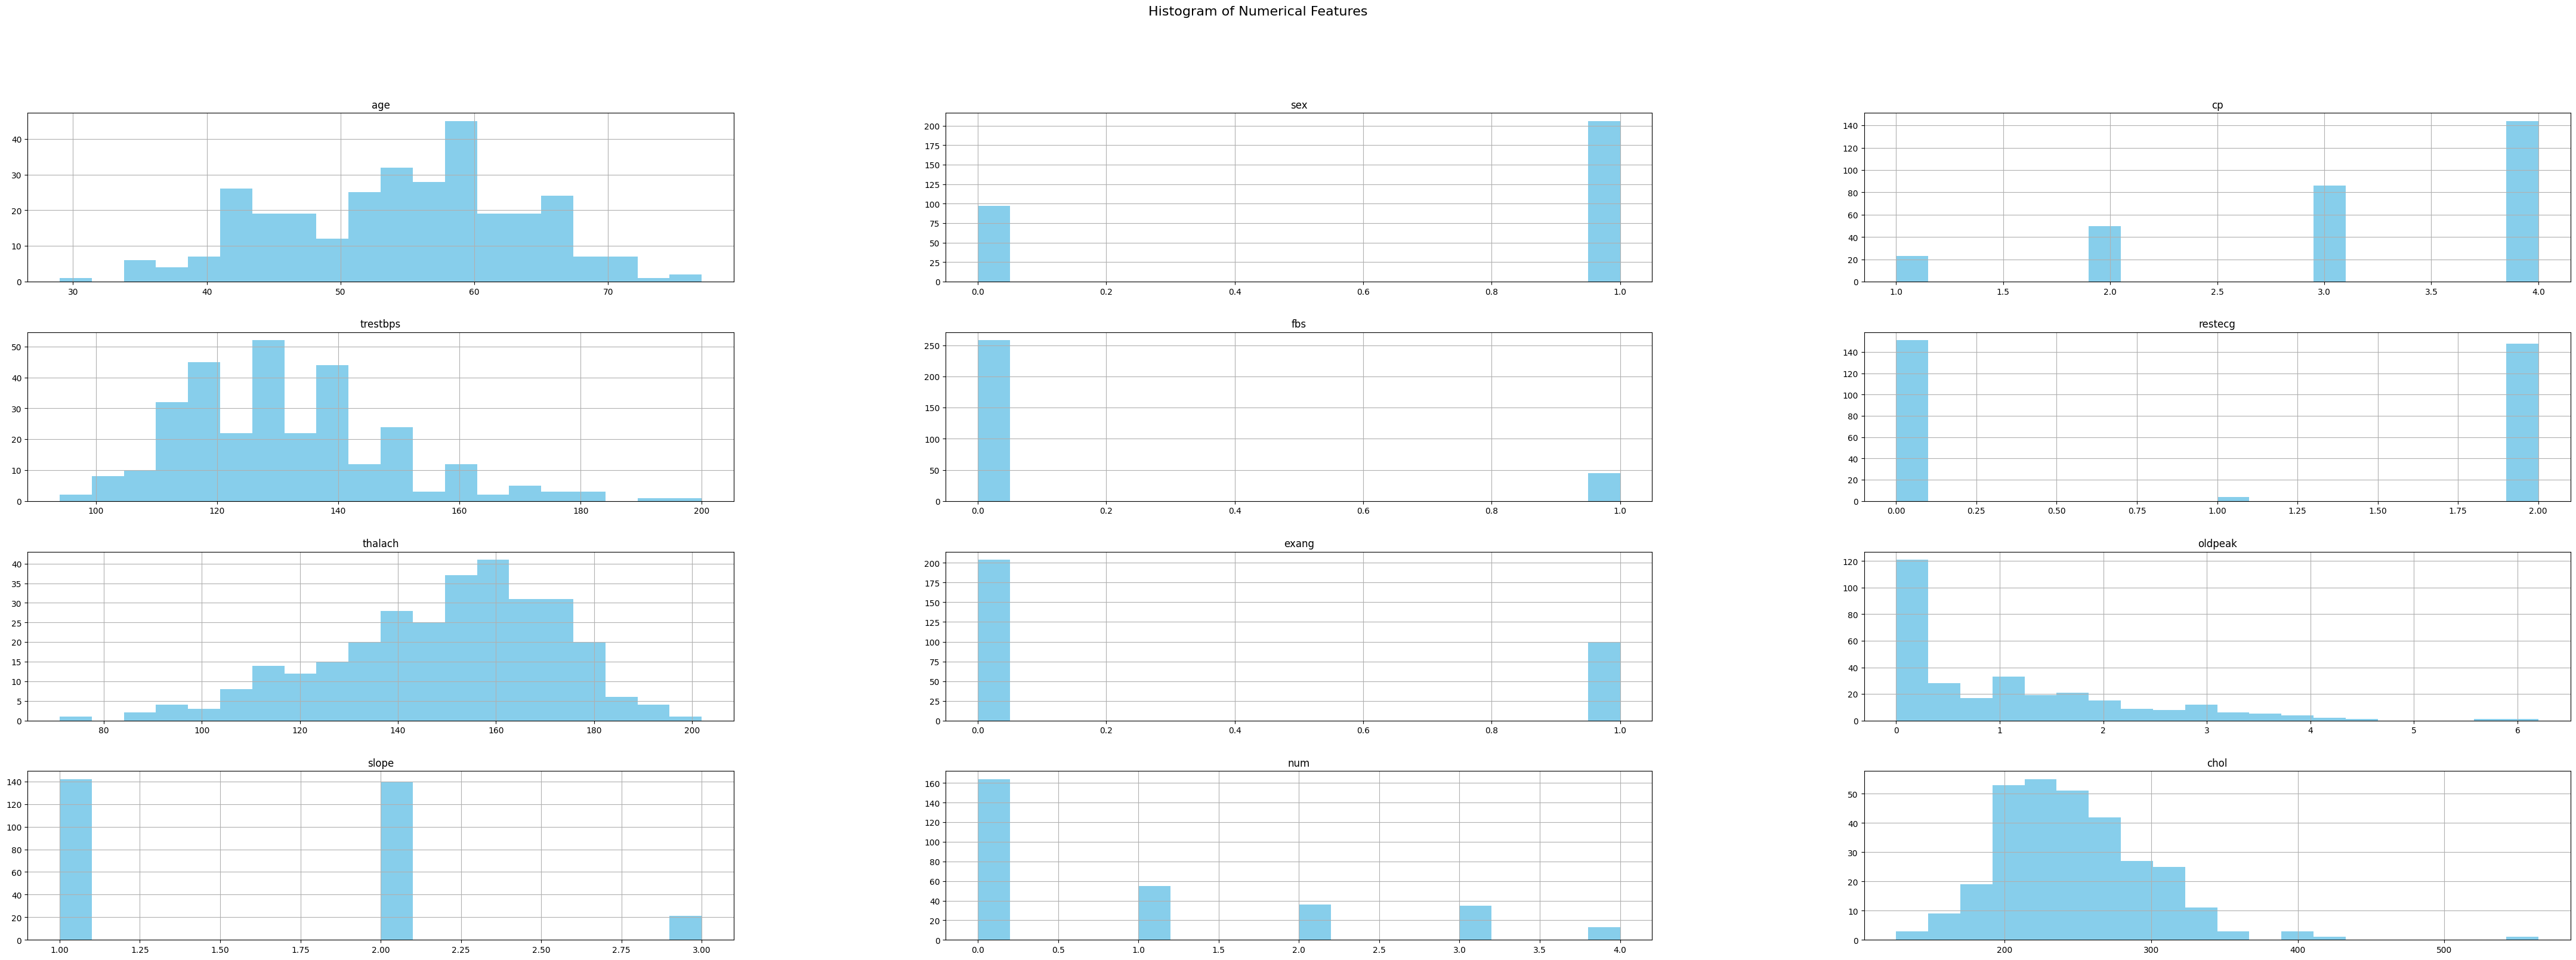

In [159]:
#histogram for numerical features
cholesterol_data.hist(bins=20,figsize=(55,18),color='skyblue')
plt.suptitle('Histogram of Numerical Features',fontsize=16)
plt.show()



*   age:The age distribution shows a peak around 50-60 years indicating that most patients fall within this middle aged to older adult group.There is a stedy decrease in frequency for younger and older age group
*   sex:The distribution is skewed towards 1 suggesting that majority of patient are male


*   cp:The histogram shows that many patients experience chest pain type 4 followed by type 3 while fewer patients fall into type 1 and 2
*   trestbps:Resting blood pressure mostly range between 110 and 150 mmHg with few higher outlier.This suggest a general tendency towards higher than normal blood pressure levels among patient

*   fbs:The majority of patients have fbs below 120mg/dl(0) with a smaller portion above(1)

*   restecg:Most patients fall into a restecg value of 1 indicating that majority have either a normal ECG or only slight abnormalities
*   thalach:The maximum heart rate achieved shows a bell shaped distribution centered around 140-160 bpm


*   exang:Most patients dont experience exercise induced angina(0)while a smaller group does (1)suggesting that not many have angina upon exertion


*   oldpeak:The oldpeak values are concentrated around 0 to 2 with some higher values suggesting most patients show little to moderate ST depression after exercise
*   slope:The histogram shows a high concentration at 2 indicating most patient have a flat slope in their segment


*   chol:The cholesterol distribution is somewhat bell shaped peaking around 200-300 mg/dlwhich indicates many patients have elevated cholesterol level





















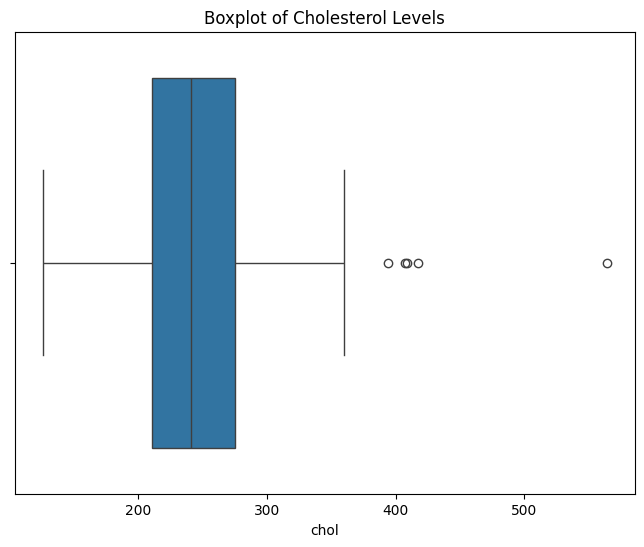

In [160]:
#boxplot for cholesterol levels
plt.figure(figsize=(8,6))
sns.boxplot(x=cholesterol_data['chol'])
plt.title('Boxplot of Cholesterol Levels')
plt.show()

The boxplot of cholesterol level shows a generally centralized distribution with a few outlier on higher end indicating the most cholesterol level falls within a normal range but a few individuals has significantly higher values

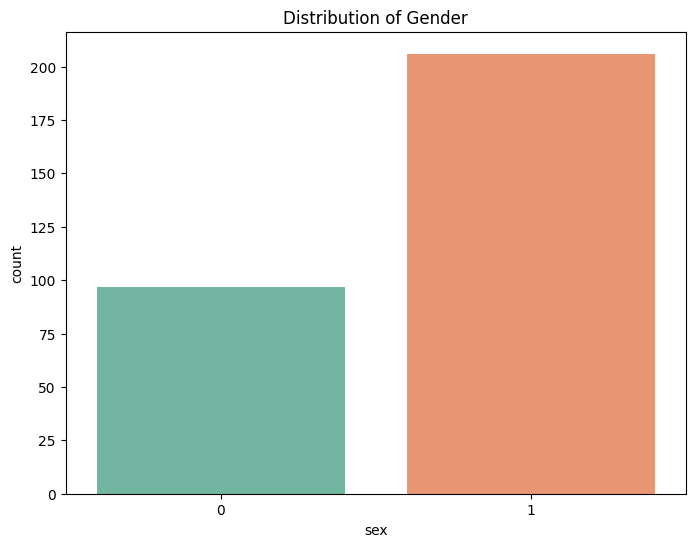

In [161]:
#barplot for categorical features
plt.figure(figsize=(8,6))
sns.countplot(x='sex',data=cholesterol_data,palette='Set2')
plt.title('Distribution of Gender')
plt.show()

The gender distribution plot shows that there are significantly more individual in one gender category compared to other in the dataset

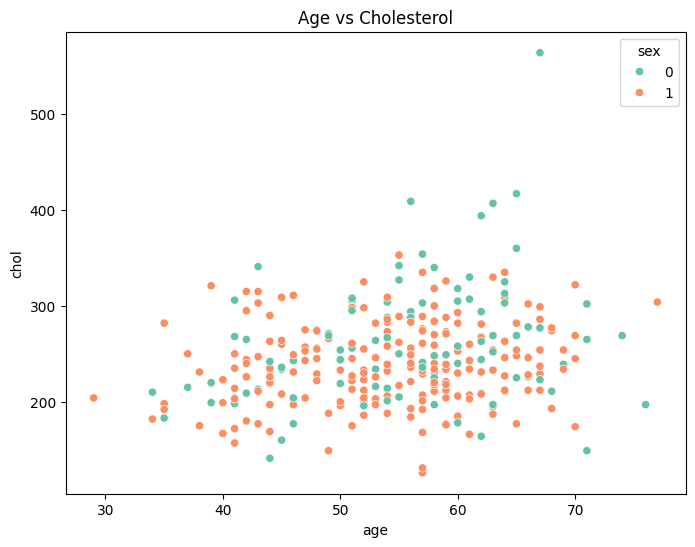

In [162]:
#scatterplot for age vs cholesterol
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='chol',data=cholesterol_data,hue='sex',palette='Set2')
plt.title('Age vs Cholesterol')
plt.show()

There is no clear correlation between age and cholesterol levels as values are widely spread across the age range.Both sexes exhibit a similar distribution of cholesterol with most value clustered between 200 and 350. Overall age doesnt appear to significantly influence cholesterol in this dataset

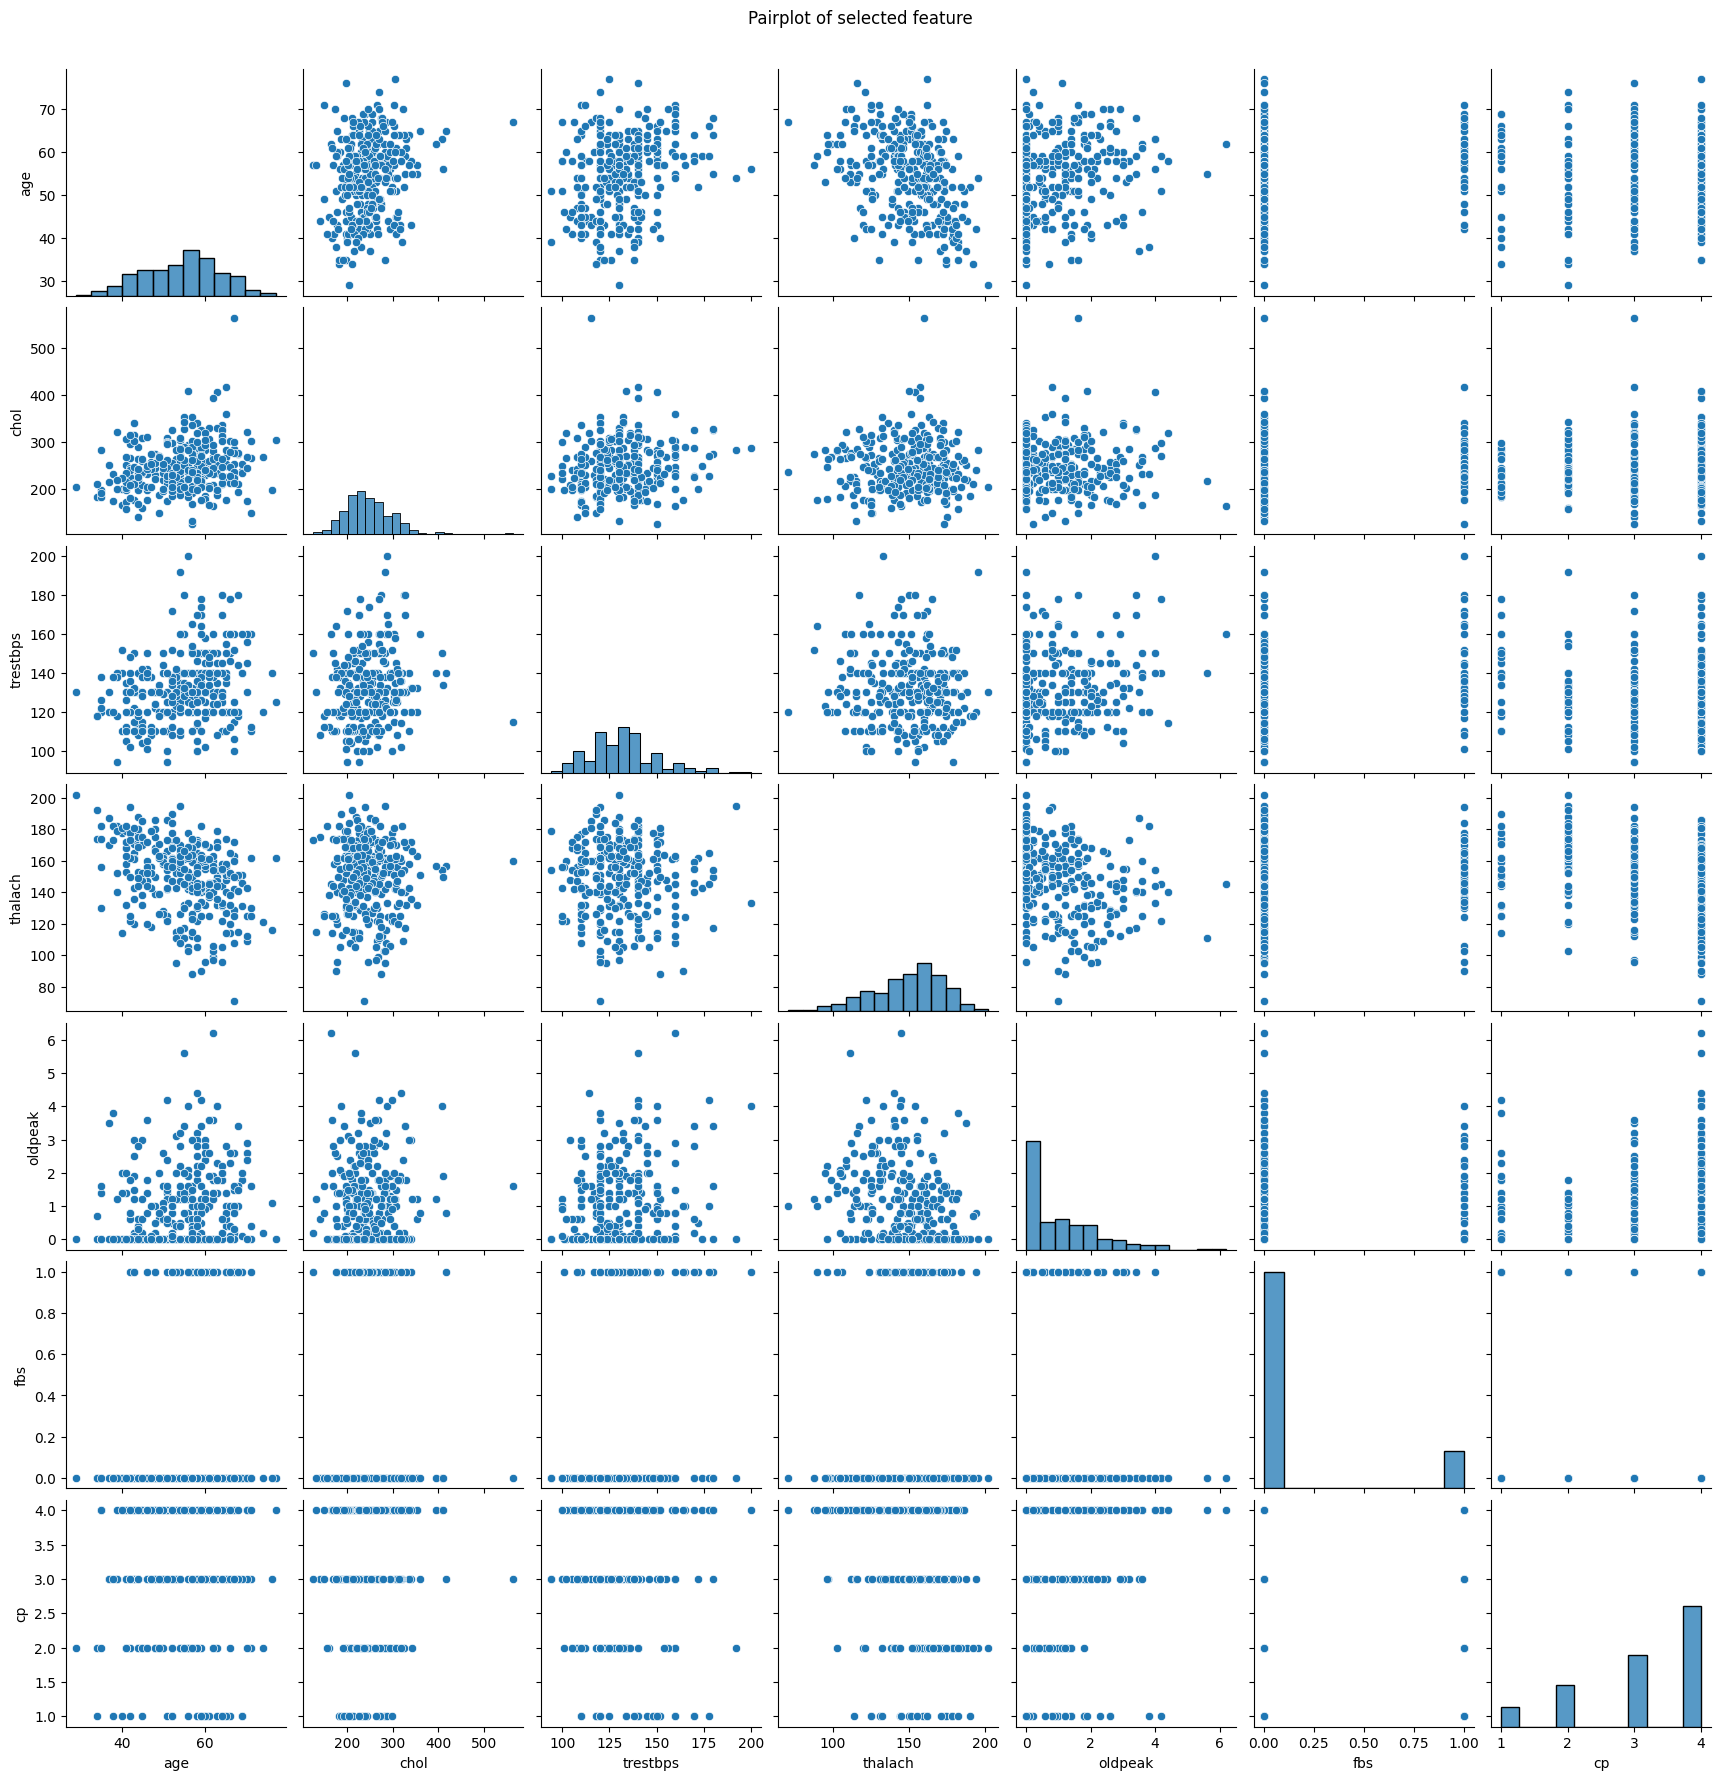

In [163]:
#pairplot to see pairwise relationships
sns.pairplot(cholesterol_data[['age','chol','trestbps','thalach','oldpeak','fbs','cp']])
plt.suptitle('Pairplot of selected feature',y=1.02)
plt.show()



*   age vs chol:There appears to be no strong linear relationship between age and cholesterol level.cholesterol level seems widely spread across ages
*   chol:The distribution of cholesterol values is centered around a particular age with some skew towards higher cholesterol values


*   trestbps vs chol:There is no clear trend or linear relationship between resting bloodpressure and cholesterol,though some clustering may indicate slight associations in certain range
*   thalach: There is no significant correlation between maximum heart rate achieved and cholesterol.Higher cholesterol level donot seem to consistently affect maximum heart rate


*   oldpeak:The plot for oldpeak and cholesterol also lack a clear pattern indicating no significant direct relationship
*   fbs:This is a binary feature (0 or 1) and the plot with chol shows no distinct relationship


*   cp:The distribution of cholesterol across different chest pain type does not show a direct correlation though certain types may have a slight tendency towards different cholesterol range


overall none of these features shows a clear strong linear relationship with cholesterol









In [164]:
#check for missing value
cholesterol_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0
slope,0


In [165]:
#Converting 'ca' and 'thal' to numeric forcing error to NaN
cholesterol_data['ca']=pd.to_numeric(cholesterol_data['ca'],errors='coerce')
cholesterol_data['thal']=pd.to_numeric(cholesterol_data['thal'],errors='coerce')

This changes ca and thal column into numbers and if it find anything is not number it mark it as missing

In [166]:
#Filling missing value with median
cholesterol_data['ca'].fillna(cholesterol_data['ca'].median(),inplace=True)
cholesterol_data['thal'].fillna(cholesterol_data['thal'].median(),inplace=True)

In [167]:
#verify
cholesterol_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0
slope,0


In [168]:
#Outliers

In [169]:
cholesterol_data.describe()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294,246.693069
std,9.038662,0.467299,0.960126,17.599748,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536,51.776918
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,126.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,211.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,241.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,275.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,564.000000


From summary statistics regarding outliers we understand:


*   chol:cholesterol level above 200mg/dl are generally considered high.The 75th percentile for chol is 275mg/dl means 75% of the patient have cholesterol level below this threshold.564,maximum value is very high than 75th percentile means it is an high cholesterol level. we cant remove this outlier as it refers to rare medical condition hypercholesterolemia.
*   trestbps:Normal resting blood pressure ranges from about 90/60 mmHg to 120/80mmHg.The 75th percentile of trestbps is 140 mmHg,which is already on the high side.200 mmHg is above this range and could indicate severe hypertension


*   thalach:The minimum value for thalach is 71 beats per minute which is low when compared with 25th percentile of 133.5 and median 153.Low heart rate could indicate heart issue
*   oldpeak:old peak measures the ST depression induced by exercise relative to rest. Range is often between 0 and 2. 6.2 is higher than 75th percentile 1.6 which can means severe ST depression


*   In rest columns there are no outliers








In [170]:
#visualizing outliers using Boxplot

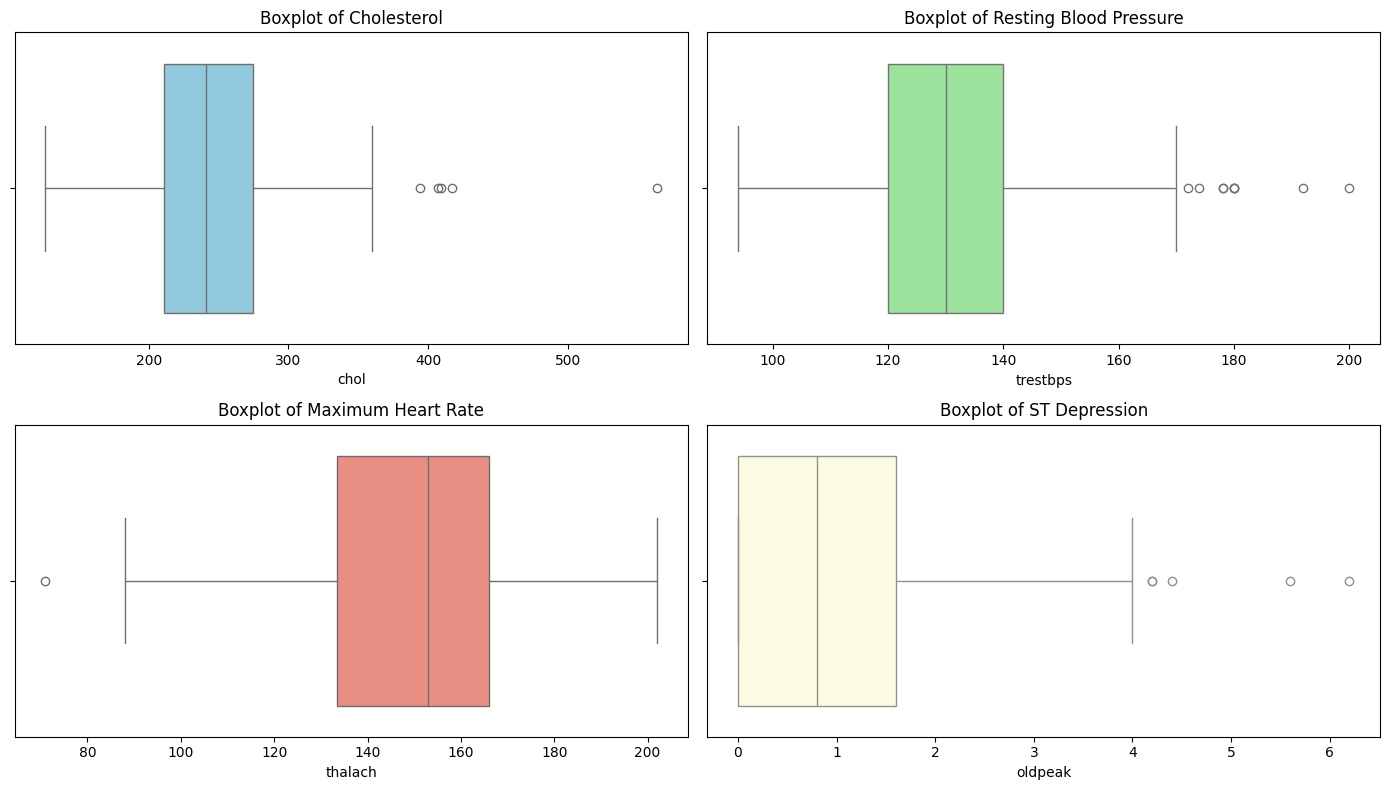

In [171]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
sns.boxplot(x=cholesterol_data['chol'],color='skyblue')
plt.title('Boxplot of Cholesterol')

plt.subplot(2,2,2)
sns.boxplot(x=cholesterol_data['trestbps'],color='lightgreen')
plt.title('Boxplot of Resting Blood Pressure')

plt.subplot(2,2,3)
sns.boxplot(x=cholesterol_data['thalach'],color='salmon')
plt.title('Boxplot of Maximum Heart Rate')

plt.subplot(2,2,4)
plt.title('Boxplot of ST Depression')
sns.boxplot(x=cholesterol_data['oldpeak'],color='lightyellow')
plt.tight_layout()
plt.show()




*   cholesterol:The cholesterol level have a few high outlierswith most value concentrated around the 200-300 range
*   Resting blood pressure:Resting blood pressure show several high outliers with typical values around 110-140


*   Maximum heart Rate :maximum heart rate has one low outlier with most values clustering around 140-160
*   old peak:values include a high few outlier with most data point between 0 and 1





In [172]:
numerical_cols=cholesterol_data.select_dtypes(include=['int64','float64']).columns

In [173]:
def detect_outlier(cholesterol_data,col):
  Q1=cholesterol_data[col].quantile(0.25)
  Q3=cholesterol_data[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers=cholesterol_data[(cholesterol_data[col]<lower_bound)|(cholesterol_data[col]>upper_bound)]
  return len(outliers),outliers[col].values

identify and count outliers in each numerical column

In [174]:
for col in numerical_cols:
  outlier_count,outlier_value=detect_outlier(cholesterol_data,col)
  print(f'Outlier count for {col}:{outlier_count}')
  print(f'Outlier value for {col}:{outlier_value}')
  print('\n')

Outlier count for age:0
Outlier value for age:[]


Outlier count for sex:0
Outlier value for sex:[]


Outlier count for cp:23
Outlier value for cp:[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Outlier count for trestbps:9
Outlier value for trestbps:[172 180 200 174 178 192 180 178 180]


Outlier count for fbs:45
Outlier value for fbs:[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


Outlier count for restecg:0
Outlier value for restecg:[]


Outlier count for thalach:1
Outlier value for thalach:[71]


Outlier count for exang:0
Outlier value for exang:[]


Outlier count for oldpeak:5
Outlier value for oldpeak:[6.2 5.6 4.2 4.2 4.4]


Outlier count for slope:0
Outlier value for slope:[]


Outlier count for ca:20
Outlier value for ca:[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


Outlier count for thal:0
Outlier value for thal:[]


Outlier count for num:0
Outlier value for num:[]


Outlier count for chol:5
Outlier value for c

prints number and values of outlier for each column

In [175]:
#Handling outliers

Decided to retain the outliers and proceed with the project

In [176]:
#drop irrelevant columns
columns_to_drop=['cp','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
cholesterol_data=cholesterol_data.drop(columns=columns_to_drop)



*   cp:chest pain is more indicative of heart disease and less directly related to cholesterol level
*   restecg:This relates more to heart function and rhythm than cholesterol


*   thalach:maximum heart rate is not directly influenced by cholesterol level
*   exang:it points to heart blockage but doesnot tell us directly about cholesterol level


*   oldpeak:This feature is specific to heart health not cholesterol
*   slope: it is heart specific not cholesterol


*   ca:more about diagnosing heart disease
*   thal:more about detecting abnormal hemoglobin


*   num:cholesterol is a risk factor for heart disease but this feature reflect disease state not cholesterol











In [177]:
#Feature engineering

In [178]:
#age binning
#define age bins and label based on cholesterol risk
age_bins=[0,40,50,60,70,100]
age_labels=['<40','40-49','50-59','60-69','70+']

In [179]:
cholesterol_data['age_bin']=pd.cut(cholesterol_data['age'],bins=age_bins,labels=age_labels,right=False)

we create age category to capture non linear effect on cholesterol

In [180]:
import numpy as np

In [181]:
cholesterol_data['age_risk_index']=pd.cut(cholesterol_data['age'],bins=age_bins,labels=[1,2,3,4,5],right=False).astype(np.int64)

This feature helps cholesterol prediction by assigning a numeric risk level(1 to 5) to different age group reflecting the increased likelihood ofcholesterol issues in older individual

In [182]:
cholesterol_data['bp_category']=pd.cut(cholesterol_data['trestbps'],
                                       bins=[90,120,130,140,201],
                                       labels=[1,2,3,4],
                                       right=True).astype(np.int64)

The code categorizes trestbps into four risk levels(normal to hypertension stages)based on specified ranges[90,120,130,140,201].these categories(labeled 1 to 4) segment blood pressure into level which may influence cholesterol levels

In [183]:
cholesterol_data['chol_age_ratio']=cholesterol_data['chol']/cholesterol_data['age']

this feature help in identify abnormal cholesterol levels relative to a person's age

In [184]:
cholesterol_data['sex_age_interaction']=cholesterol_data['sex']*cholesterol_data['age']

This feature helps in improving cholesterol prediction by capturing combined effect of gender and age on cholesterol level

In [185]:
cholesterol_data['chol_risk_score']=0.4*cholesterol_data['age']+0.3*cholesterol_data['trestbps']+0.3*cholesterol_data['fbs']

created a combined risk score

In [186]:
#interaction terms
cholesterol_data['age_trestbps_interaction']=cholesterol_data['age']*cholesterol_data['trestbps']

age*trestbps:older individual with high blood pressure might be more prone to high cholesterol capturing a strong effect

In [187]:
cholesterol_data['high_risk_gender']=(((cholesterol_data['sex']==1)&(cholesterol_data['age']<45)) | \
                                      ((cholesterol_data['sex']==0)&(cholesterol_data['age']>50))).astype(np.int64)

The high_risk_gender code assign 1 to male under 45 or females over 50 as these group have high cholesterol risk due to hormonal factor otherwise 0

In [188]:
cholesterol_data['metabolic_syndrome_risk']=((cholesterol_data['fbs']==1)&(cholesterol_data['trestbps']>=130)).astype(np.int64)

This feature help identify people with both high blood sugar and high blood pressure.These condition are often linked to higher cholesterol level

In [189]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cholesterol_data['age_bin']=le.fit_transform(cholesterol_data['age_bin'])

In [190]:
cholesterol_data=cholesterol_data.drop(columns=['age','sex','trestbps','fbs'])

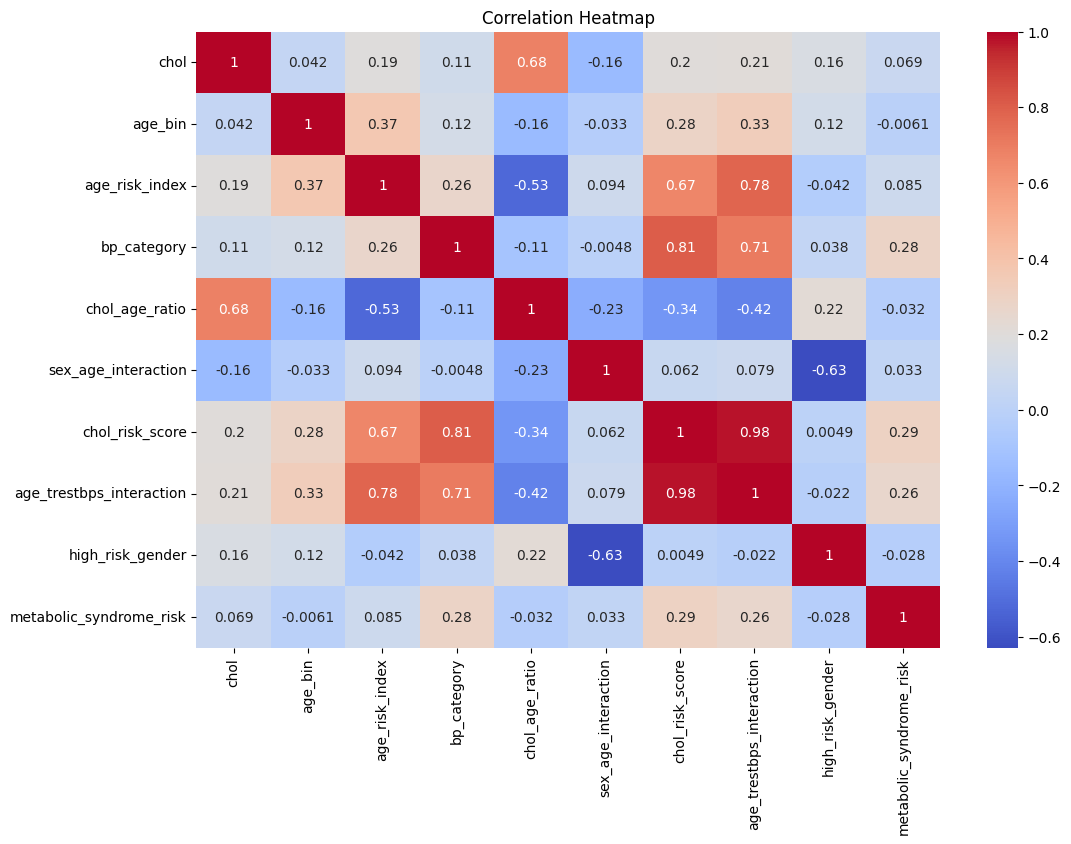

In [191]:
plt.figure(figsize=(12,8))
sns.heatmap(cholesterol_data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



*   age_bin(0.042 correlation with chol):very low correlation with chol
*   age_risk_index(0.19 correlation with chol):This feature has a weak positive correlation with cholesterol


*   bp_category(0.11 correlation with chol):This feature has a weak positive correlation with cholesterol
*   chol_age_ratio(0.68 correlation with chol):This has a strong positive correlation with cholesterol


*   sex_age_interaction(-0.16 correlation with chol):This feature has a low negative correlation with cholesterol
*   chol_risk_score(0.20 correlation with chol):This feature has a moderate positive correlation with cholesterol


*   age_trestbps_interaction(0.21 correlation with chol):This feature has a moderate positive correlation with cholesterol
*   high_risk_gender(0.16 corrrelation with chol):weakly correlated with chol


*   metabolic_syndrome_risK(0.069 correlation with chol):very low correlation with chol











In [192]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical_features=cholesterol_data.select_dtypes(include=['int64','float64']).columns
cholesterol_data_scaled=cholesterol_data.copy()
cholesterol_data_scaled[numerical_features]=scaler.fit_transform(cholesterol_data[numerical_features])

In [193]:
cholesterol_data_scaled.columns

Index(['chol', 'age_bin', 'age_risk_index', 'bp_category', 'chol_age_ratio',
       'sex_age_interaction', 'chol_risk_score', 'age_trestbps_interaction',
       'high_risk_gender', 'metabolic_syndrome_risk'],
      dtype='object')

In [194]:
#define target variables and features
y=cholesterol_data_scaled['chol']
x=cholesterol_data_scaled.drop(columns=['chol'])

In [195]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train_chol,y_test_chol=train_test_split(x,y,test_size=0.2,random_state=42)

In [196]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
rf=RandomForestRegressor(random_state=42)

In [197]:
#fit model
rf.fit(x_train,y_train_chol)

RandomForestRegressor(random_state=42)

In [198]:
#make prediction using best model
y_pred_chol=rf.predict(x_test)

In [199]:
#model evaluation
from sklearn.model_selection import cross_val_score
import numpy as np
mse=mean_squared_error(y_test_chol,y_pred_chol)
mae=mean_absolute_error(y_test_chol,y_pred_chol)
r2=r2_score(y_test_chol,y_pred_chol)
cv_scores_rf=cross_val_score(rf,x_train,y_train_chol,cv=5,scoring='r2')
mean_rf=np.mean(cv_scores_rf)

In [200]:
#print model evaluation
print(f'Mean Squared Error(MSE):{mse}')
print(f'Mean Absolute Error(MAE):{mae}')
print(f'R-squared(R2):{r2}')
print(f'Cross-Validation Scores(R2):{cv_scores_rf}')
print(f'Mean Cross-Validation Score(R2):{mean_rf}')

Mean Squared Error(MSE):0.24720393230209528
Mean Absolute Error(MAE):0.23229913194203092
R-squared(R2):0.8367853537295411
Cross-Validation Scores(R2):[0.87292371 0.92028609 0.84631988 0.89333462 0.90618022]
Mean Cross-Validation Score(R2):0.8878089046665147


Overall interpretation:
The model demonstrate strong predictive power with both mse and mae values
indicating that errors are relatively small.The high R2 value shows that model  explains a significant portion of varience in the target variable making it a solid performer for prediction.The consistent cross validation score further affirm the model's reliability and robustness across different  dataset

In [201]:
#Ensemble learning:GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor(random_state=42)
gb_model.fit(x_train,y_train_chol)
y_pred_gb_chol=gb_model.predict(x_test)
mse_gb=mean_squared_error(y_test_chol,y_pred_gb_chol)
r2_gb=r2_score(y_test_chol,y_pred_gb_chol)
mae_gb=mean_absolute_error(y_test_chol,y_pred_gb_chol)
cv_scores_gb=cross_val_score(gb_model,x_train,y_train_chol,cv=5,scoring='r2')
mean_gb=np.mean(cv_scores_gb)

In [202]:
#print model evaluation
print(f'Gradient boosting Mean Squared Error(MSE):{mse_gb}')
print(f'Gradient boosting Mean Absolute Error(MAE):{mae_gb}')
print(f'Gradient boosting R-squared(R2):{r2_gb}')
print(f'Gradient boosting Cross-Validation Scores(R2):{cv_scores_gb}')
print(f'Gradient boosting Mean Cross-Validation Score(R2):{mean_gb}')

Gradient boosting Mean Squared Error(MSE):0.19927805980418334
Gradient boosting Mean Absolute Error(MAE):0.22073299496907173
Gradient boosting R-squared(R2):0.8684280717644253
Gradient boosting Cross-Validation Scores(R2):[0.90633035 0.94215887 0.893978   0.92064504 0.95262487]
Gradient boosting Mean Cross-Validation Score(R2):0.9231474256514073


In [203]:
#Ridge
from sklearn.linear_model import Ridge
ridge=Ridge(random_state=42)
ridge.fit(x_train,y_train_chol)
y_pred_ridge_chol=ridge.predict(x_test)

In [204]:
mse_ridge=mean_squared_error(y_test_chol,y_pred_ridge_chol)
mae_ridge=mean_absolute_error(y_test_chol,y_pred_ridge_chol)
r2_ridge=r2_score(y_test_chol,y_pred_ridge_chol)
cv_scores_ridge=cross_val_score(ridge,x_train,y_train_chol,cv=5,scoring='r2')
mean_ridge=np.mean(cv_scores_ridge)

In [205]:
#print evaluation
print(f'Ridge Mean Squared Error(MSE):{mse_ridge}')
print(f'Ridge Mean Absolute Error(MAE):{mae_ridge}')
print(f'Ridge R-squared(R2):{r2_ridge}')
print(f'Ridge Cross-Validation Scores(R2):{cv_scores_ridge}')
print(f'Ridge Mean Cross-Validation Score(R2):{mean_ridge}')

Ridge Mean Squared Error(MSE):0.08646219253797319
Ridge Mean Absolute Error(MAE):0.19300396393939723
Ridge R-squared(R2):0.9429139494690231
Ridge Cross-Validation Scores(R2):[0.91107982 0.94262332 0.89206144 0.92737701 0.90688554]
Ridge Mean Cross-Validation Score(R2):0.9160054261870012


In [206]:
#comparing model based on performance
print('Model performance comparision')
print(f'Random Forest: MSE:{mse},MAE:{mae},R2:{r2},CV R2={mean_rf}')
print(f'Gradient Boosting: MSE:{mse_gb},MAE:{mae_gb},R2:{r2_gb},CV R2={mean_gb}')
print(f'Ridge: MSE:{mse_ridge},MAE:{mae_ridge},R2:{r2_ridge},CV R2={mean_ridge}')

Model performance comparision
Random Forest: MSE:0.24720393230209528,MAE:0.23229913194203092,R2:0.8367853537295411,CV R2=0.8878089046665147
Gradient Boosting: MSE:0.19927805980418334,MAE:0.22073299496907173,R2:0.8684280717644253,CV R2=0.9231474256514073
Ridge: MSE:0.08646219253797319,MAE:0.19300396393939723,R2:0.9429139494690231,CV R2=0.9160054261870012


In [207]:
#selecting best performance model for further tuning
model_performance={
    'Random Forest':{
        'MSE':mse,
        'MAE':mae,
        'R2':r2,
       },
    'Gradient Boosting':{
        'MSE':mse_gb,
        'MAE':mae_gb,
        'R2':r2_gb,
    },
    'Ridge':{
        'MSE':mse_ridge,
        'MAE':mae_ridge,
        'R2':r2_ridge,
    },
}
best_model=max(model_performance.items(),key=lambda item:(item[1]['R2'],-item[1]['MSE'],-item[1]['MAE']))
model_name,metrics=best_model
param_grid={}
estimator=None
if model_name=='Random Forest':
  print('Random Forest is the best model')
  estimator=RandomForestRegressor()
  param_grid={
      'n_estimators':[100,200],
      'max_depth':[None,5,10],
      'min_samples_split':[2,5,10],
      'min_samples_leaf':[1,2,4]
  }
elif model_name=='Gradient Boosting':
  print('Gradient Boosting is the best model')
  estimator=GradientBoostingRegressor()
  param_grid={
      'n_estimators':[100,200],
      'learning_rate':[0.01,0.1],
      'max_depth':[3,5,7],
      'min_samples_split':[2,5,10],
      'min_samples_leaf':[1,2,4]
  }
else:
  print('Ridge Regression is the best model')
  estimator=Ridge()
  param_grid={
      'alpha':[0.01,0.1,1.0],
      'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'],
      'fit_intercept':[True,False]
  }

Ridge Regression is the best model


In [208]:
#Hyperparameter tuning on best model
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
grid_search.fit(x_train,y_train_chol)
print(f'Best parameter for {estimator.__class__.__name__}:{grid_search.best_params_}')
print(f'Best cross-validation score:{grid_search.best_score_}')

Best parameter for Ridge:{'alpha': 0.1, 'fit_intercept': True, 'solver': 'sparse_cg'}
Best cross-validation score:0.9178151964442698


In [209]:
#create best model with best parameter
best_ridge_model=Ridge(alpha=0.1,fit_intercept=False,solver='lsqr')

In [210]:
#fit best model on training data
best_ridge_model.fit(x_train,y_train_chol)

Ridge(alpha=0.1, fit_intercept=False, solver='lsqr')

In [211]:
#make prediction
y_pred_best_ridge=best_ridge_model.predict(x_test)

In [212]:
#Evaluate performance
mse_best_ridge=mean_squared_error(y_test_chol,y_pred_best_ridge)
mae_best_ridge=mean_absolute_error(y_test_chol,y_pred_best_ridge)
r2_best_ridge=r2_score(y_test_chol,y_pred_best_ridge)



In [213]:
#print
print(f'Best Ridge Mean Squared Error(MSE):{mse_best_ridge}')
print(f'Best Ridge Mean Absolute Error(MAE):{mae_best_ridge}')
print(f'Best Ridge R-squared(R2):{r2_best_ridge}')

Best Ridge Mean Squared Error(MSE):0.08023518371352165
Best Ridge Mean Absolute Error(MAE):0.1840438312337984
Best Ridge R-squared(R2):0.9470252879624734


In [214]:
import shap
explainer=shap.Explainer(best_ridge_model,x_train)
shap_values=explainer(x_test)

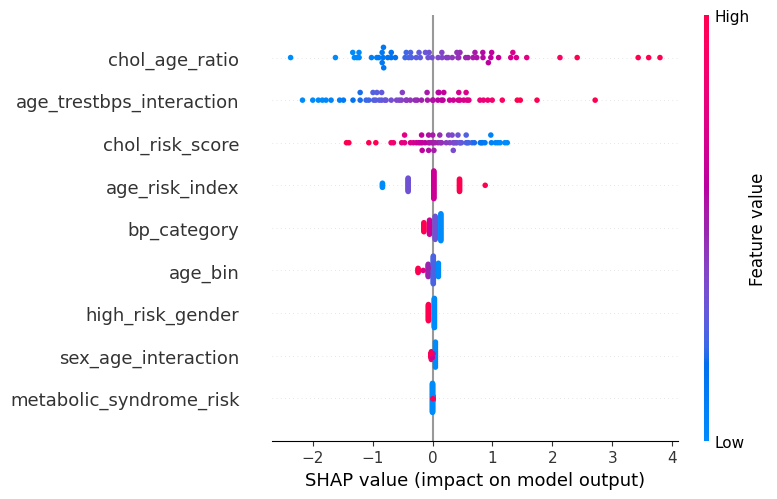

In [215]:
shap.summary_plot(shap_values,x_test)



*  Key feature:The model relies most on chol_age_ratio ,age_trestbps_interaction,chol_risk_score,age_risk_index and bp_category which have high impact on prediction


*   impact direction:high values in chol_age_ratio and age_trestbps_interaction increase the risk prediction shown by positive shap values while lower value reduces it
*   value effect:feature like bp_category and age_binshow that higher values generallypush prediction towards higher risk


*   variability:features like chol_risk_score have a spread of shap valuesindicating variable impact depending on the instance


*   lesser impact:lower ranked feature such as sex_age_interaction and metabolic_syndrome_risk have smaller more variable risk









UNDERSTAND FRAMINGHAM DATASET AND ITS FEATURES

In [216]:
#display first few rows
framingham_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [217]:
#shape of framingham dataset
framingham_data.shape

(4240, 16)

It has 4240 rows and 16 columns

In [218]:
#dataset of framingham dataset
framingham_data.dtypes

,0
male,int64
age,int64
education,float64
currentSmoker,int64
cigsPerDay,float64
BPMeds,float64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64
totChol,float64


In [219]:
#structure and basic info of framingham dataset
framingham_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [220]:
#summary statistics of framingham dataset
framingham_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000




*   Approximately 43% of patients are male
*   Age:The mean age is about 49.580 with a range from 32 to 70 years.This suggest that the dataset include middle age individuals


*   current smokers:nearly half(49.4%) of people are current smoker with an average consumption ofabout 9 cigs per day.However there is a significant variability (std 11.92) indicating that while many may smoke little some may smoke heavily
*   prevalent stroke:0.59% of people reported a history of stroke


*   prevalent hypertension:31.1%of people are reported to have hypertension
*   Diabetes:The prevalence ofdiabetes is low at 2.6%

*   Blood pressure:The average systolic blood pressure is 236.7mmHg and diastolic pressure is 132.4mmHg both of which are considerably higher than normal values
*   Totchol:The average totchol level is 236.7mg/dlwhich is slightly above the recommended level


*   BMI:The average BMI is 25.8 which categorizes people mostly in the overweight range(25-29.9)The variability in BMI is notable indicating a range from underweight to obese
*   Heartrate:The average heartrate is around 75.9 beats per minute which falls within a normal resting heart rate range

*   glucose level:Average glucose level are 81.9mg/dl which is within normal limit
*   TenYearCHD:mean is 15.2%indicating that people in this dataaset have a significant risk of developing heart disease over next decade













In [221]:
#rename column
framingham_data.rename(columns={'male':'sex'},inplace=True)

In [222]:
#Frequency distribution of each column
for col in framingham_data.columns:
  print(f'Value count for {col}:')
  print(framingham_data[col].value_counts())
  print('\n')

Value count for sex:
sex
0    2420
1    1820
Name: count, dtype: int64


Value count for age:
age
40    192
46    182
42    180
41    174
48    173
39    170
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
63    110
61    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: count, dtype: int64


Value count for education:
education
1.0    1720
2.0    1253
3.0     689
4.0     473
Name: count, dtype: int64


Value count for currentSmoker:
currentSmoker
0    2145
1    2095
Name: count, dtype: int64


Value count for cigsPerDay:
cigsPerDay
0.0     2145
20.0     734
30.0     218
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0  

Gender Distribution


*   Female:2420
*   Male:1820



Age


*   The age in dataset range from 32 to 70 years
*   Most frequent occuring age is 40 years with 192 occurrences



Education


*   1.0 represent individuals with less than a high school education
*  2.0 represent high school graduates


*   3.0 represent individuals with some college education
*   4.0 represent individuals with college degree or higher


*   Most frequent occuring education level is 1.0 with 1720 individuals







Current smoker:individual who is actively smoking tobacco products


*   0 represent non smokers
*   1 represent current smokers


*   The dataset shows that there are slightly more non smokers(2145) than current smokers(2095)





cigsperday:Number of cigarettes an individual smoke daily


*   Most common is 0 cigarettes per day reported by 2145 individuals
*   1 individual reported smoking 70 cigarettes per day



BPMeds:Blood pressure medication(whether a person is taking medication to control their blood pressure)


*   0 :a person is not taking blood pressure medication
*   1: a person is taking blood pressure medication


*   4063 individuals are not taking blood pressure medication
*   124 individuals are taking blood pressure medication





prevalent stroke:whether an individual has experienced a stroke in the past


*   0 means not had a stroke
*   1 means had a stroke


*   4215 never had a stroke in the given dataset
*   25 had a stroke in the given dataset





prevalent hyp:whether an individual has history of hypertension


*   0 means individual doesnt have hypertension
*   1 means individual have hypertension


*   In the given dataset 2923 individuals doesnot have hypertension
*   1317 individuals have hypertension





Diabetes: individual have high blood sugar level


*   0 means doesnt have diabetes
*   1 means does have diabetes


*   4131 individuals in the dataset donot have diabetes
*   109 individuals have diabetes





totchol:total cholesterol


*  Most common totchol is 240mg/dl reported by 85 people



sysbp:systolic blood pressure(pressure in arteries when heart beat)


*   Normal sysBp is considered to be below 120 mmHg .130mmHg and above indicate hypertension
*   frequently recorded sysBp is 120mmHg for 107 individuals



diaBp:diastolic blood pressure.it measure the pressure in the arteries when hear is at beat between rest


*   Normal diaBp is typically between 60mmHg and 80mmHg .above 80mmHg means hypertension
*   most frequent:80mmHg by 262 individuals in the dataset



BMI


*   Most frequent:22.91,23.48,22.54,22.19 have 18 individuals



heart rate:number of time heart beat per minute


*   Normal:rate between 60 to 100 BPM
*   Most frequent:75 BPM by 563 individuals



Glucose


*  Most frequent glucose level is 75mg/dl with 193 individuals



TenYearCHD:Whether an individual will develop coronary heart disease within next 10 year


*   0 means not expected to develop heart disease in next 10 years
*   1 means risk of developing heart disease in next 10 years


*   in the given dataset 3596 individuals are not expected to heart disease in next 10 years and 644 individuals are at risk of developing heart disease






EDA Visualization

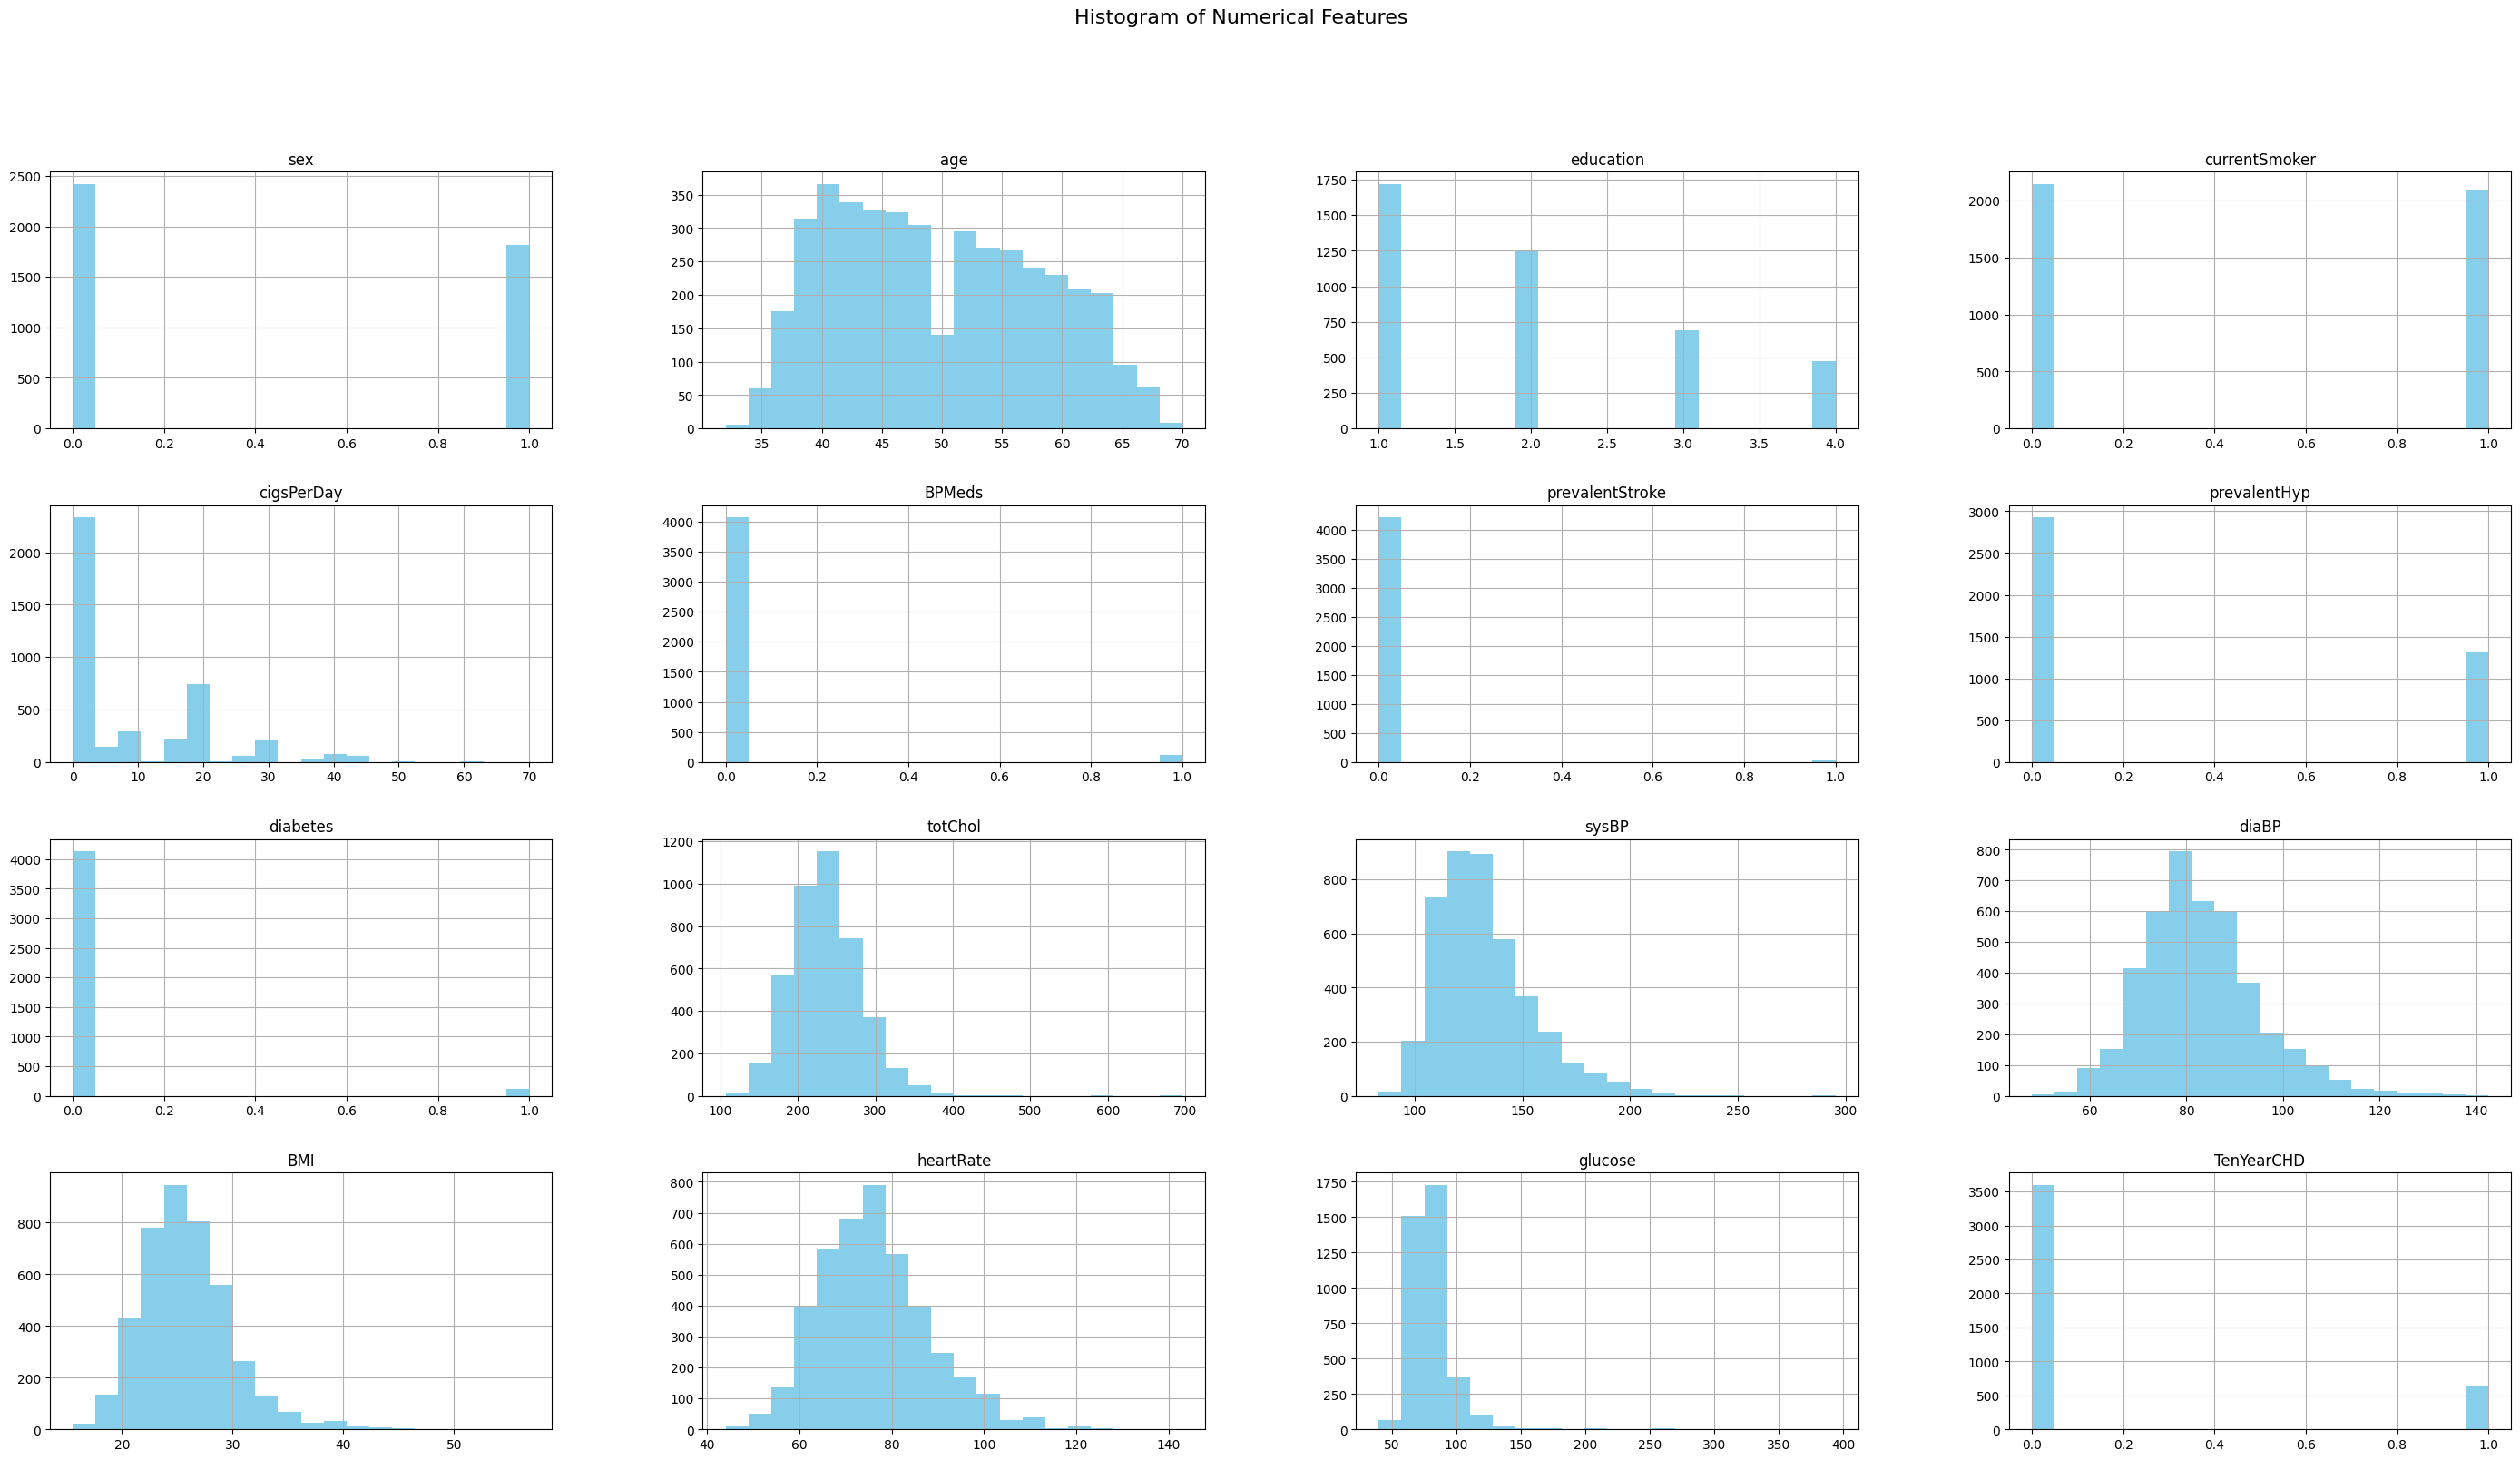

In [223]:
#histogram for numerical features
framingham_data.hist(bins=20,figsize=(35,18),color='skyblue')
plt.suptitle('Histogram of Numerical Features',fontsize=16)
plt.show()



*   sex:Nearly equal distribution between male(1) and female(0)
*   age:Most participants are aged between 40 and 60 with fewer younger and older individuals

*   Education:The largest group has education level 1with decreasing count inhigher education level(2 to 4)
*   current smoker:High prevalence of smokers(1) with a significant portion of non smoker(0)

*   cigs per day:most smokers consume fewer than 10 cigarettes per day with a few heavy smokers
*   BPMeds:Majority are not on blood pressure medication(0)with small portion on medication(1)

*   Prevalent stroke:Very few people in this dataset have a history of stroke indicating low stroke prevalence
*   prevalent Hypertension:significant portion has hypertensionwith many people in category(1)

*   Diabetes:very few people have diabetes


*   totChol:cholesterol level are normally distributed centering around 200mg/dl
*   sysBP:shows a peak around 120-150mmHg indicating a common rangefor sysBP inthis sample

*  diaBP:peaks around80-90mmHG reflecting a typical diastolic range for most individuals
*   BMI:Normal distribution with most values around 25-30suggesting an average BMIin the overweight category


*   HeartRate:distributed around 60-80bpm reflecting average resting heart rate
*   Glucose:most people have glucose level below 100mg/dl indicating normal fasting glucose for majority

*   TenYearCHD:most people have a low 10 year risk of coronary heart disease











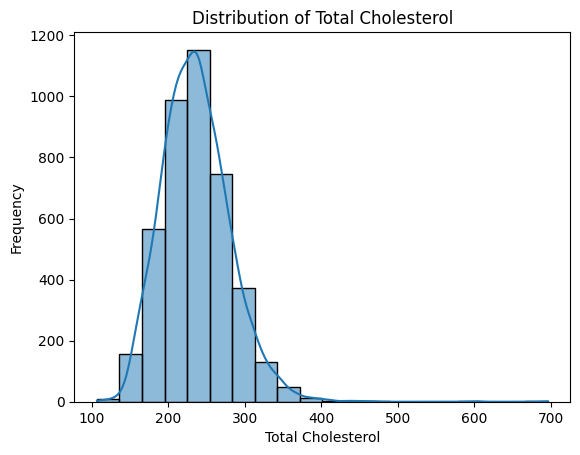

In [224]:
#Visualizing totchol
sns.histplot(framingham_data['totChol'],bins=20,kde=True)
plt.title('Distribution of Total Cholesterol')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')
plt.show()

This graph shows the distribution of total cholesterol level.most people have cholesterol level between 200 and 250 as seen by highest bar in middle of the chart.This distribution is slightly skewed to the right means there are a few individuals with very high cholesterol level but majority are within a more common range.It is bell shaped,means normal distribution with more people having average cholesterol level and fewer with extreme low or high level

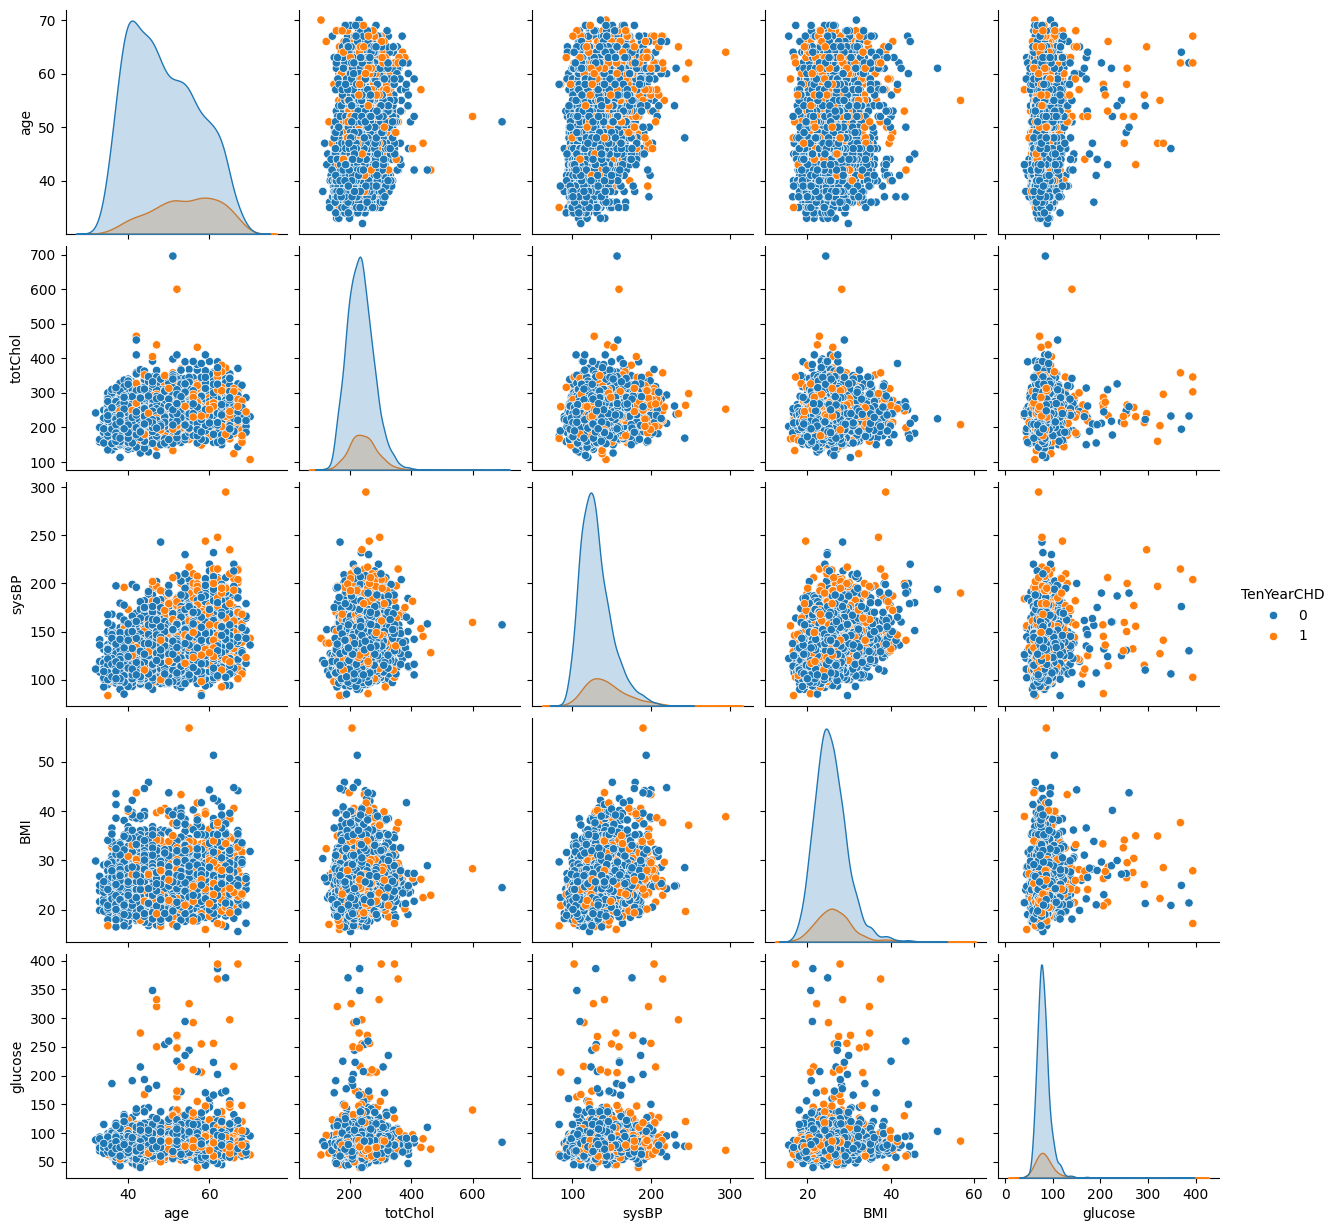

In [225]:
#pairplot
sns.pairplot(framingham_data,vars=['age','totChol','sysBP','BMI','glucose'],hue='TenYearCHD')
plt.show()

In this graph blue dots represent people without heart disease and orange dot represent people with heart disease.for age most orage dots are with older people for bloodpressure and cholesterol orange dots are most common at higher levels.for bmi and glucose there are fewer orange dots but some shows up with heart disease

In [226]:
#checking for missing value
framingham_data.isnull().sum()

,0
sex,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [227]:
#Handling missing values

In [228]:
framingham_data['education'].fillna(framingham_data['education'].mode()[0],inplace=True)

In [229]:
framingham_data['cigsPerDay'].fillna(framingham_data['cigsPerDay'].median(),inplace=True)

In [230]:
framingham_data['BPMeds'].fillna(framingham_data['BPMeds'].mode()[0],inplace=True)

In [231]:
framingham_data['totChol'].fillna(framingham_data['totChol'].median(),inplace=True)

In [232]:
framingham_data['BMI'].fillna(framingham_data['BMI'].median(),inplace=True)

In [233]:
framingham_data['heartRate'].fillna(framingham_data['heartRate'].median(),inplace=True)

In [234]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
framingham_data[['glucose']]=imputer.fit_transform(framingham_data[['glucose']])

Used KNNImputer because it help to estimate missing glucose level based on similar patient data than just using an average.In KNNImputer it fills missing value by looking at similar examples in dataset and using their values to guess what the missing one should be

In [235]:
#verify
framingham_data.isnull().sum()

,0
sex,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [236]:
#Outlier

In [237]:
framingham_data.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.955189,0.494104,8.944340,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.799005,75.878774,81.963655,0.151887
std,0.495027,8.572942,1.018522,0.500024,11.904777,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.070775,12.023937,22.831748,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


From summary statistics we get to know about outliers:

*   cigsperday:The 75th percentile is 20 cigsperday.maximum of 70 cigs per day is high and indicate severe smoking habit
*   TotChol:The 75th percentile is 262mg/dl .maximum of 696mg/dl which is high but it means possibly hypercholesterolemia.Removing this outlier is inappropriate


*   sysbp:The 75th percentile is 144mmHg .A value of 295mmHg it means hypertension  and not removing this outlier
*   DiaBP:The 75th percentile is 90mmHg and a maximum of 142.5mmHg indicates significant hypertension.This should not be removed


*   BMI:The 75th percentile is 28.03.BMI of 56.8 is considered extremely high and could indicate severe obesity
*   Heart rate:The 75th percentile is 83bpm.maximum of 143bpm is high and it can mean tachycardia.

*   glucose:The 75th percentile is 85mg/dl.maximum of 394mg/dl indicate hyperglycemia








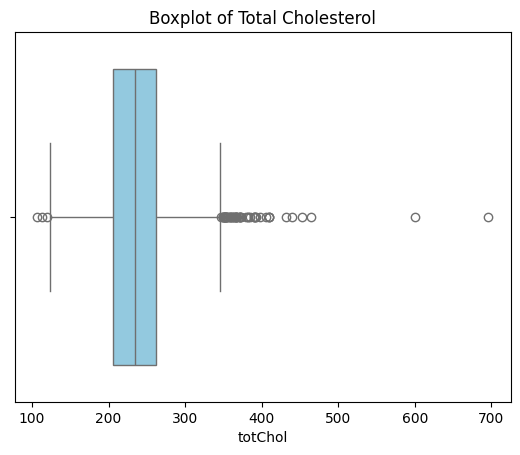

In [238]:
#visualize outlier using boxplot
sns.boxplot(x=framingham_data['totChol'],color='skyblue')
plt.title('Boxplot of Total Cholesterol')
plt.show()


The majority of cholesterol levels are between 200 and 300 mg/dl .There is a significant spread in the data with some values as low as 100 mg/dl and some as high as 700mg/dl

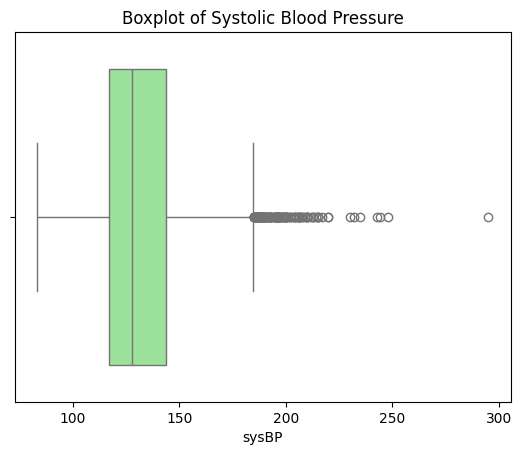

In [239]:
sns.boxplot(x=framingham_data['sysBP'],color='lightgreen')
plt.title('Boxplot of Systolic Blood Pressure')
plt.show()

The majority of sysBP values lie between 100 and 150 mmHg .There is a significant spread in the data with some values as low as 100mmHg and some as high as 300mmHg

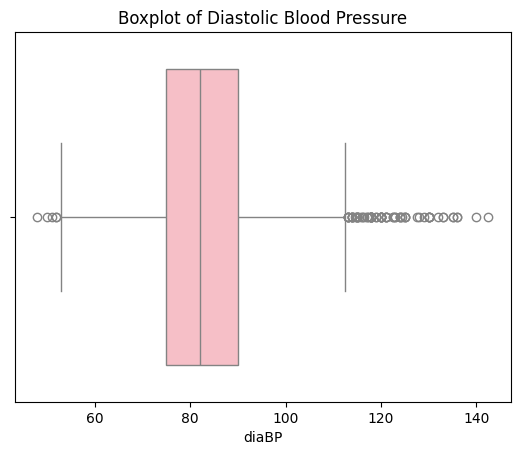

In [240]:
sns.boxplot(x=framingham_data['diaBP'],color='lightpink')
plt.title('Boxplot of Diastolic Blood Pressure')
plt.show()

The majority of diaBP values lie between 80 and 90 mmHg.There  is a significant spread in the data with some values as low as 60 mmHg and some as high as 140 mmHg

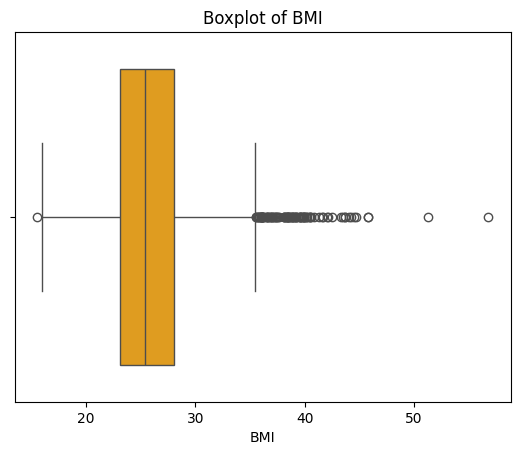

In [241]:
sns.boxplot(x=framingham_data['BMI'],color='orange')
plt.title('Boxplot of BMI')
plt.show()

The majority of BMI values lie between 20 and 30 .There is a significant spread in data with some value as low as 15 and some as high as 55

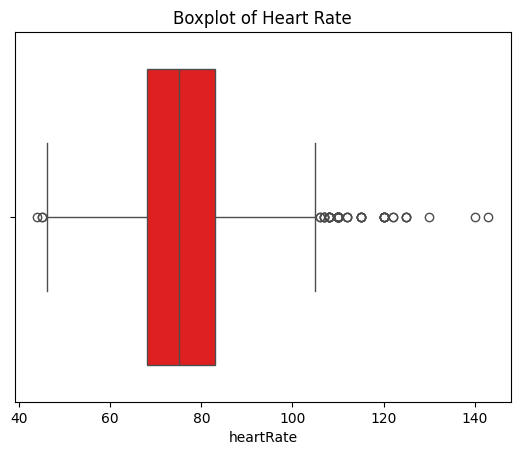

In [242]:
sns.boxplot(x=framingham_data['heartRate'],color='red')
plt.title('Boxplot of Heart Rate')
plt.show()

The majority of heart rate values lie between 80 and 85 beats per minute.There is a significant spread in the data with some values as low as 50bpm and some as high as 140bpm

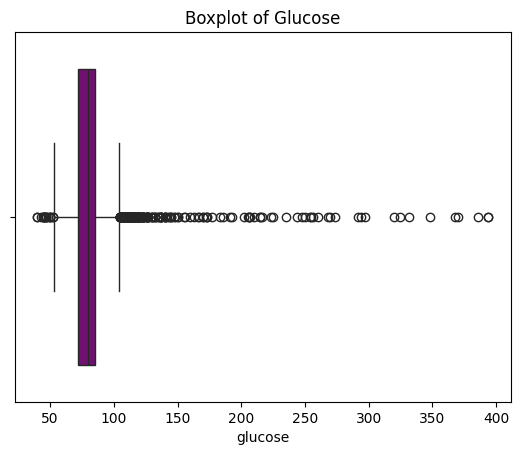

In [243]:
sns.boxplot(x=framingham_data['glucose'],color='purple')
plt.title('Boxplot of Glucose')
plt.show()

The majority of glucose level lie between 100 and 120mg/dl.There is a significant spread in the data with some values as low as 50mg/dl and some as high as 400mg/dl

In [244]:
numerical_cols=framingham_data.select_dtypes(include=['int64','float64']).columns

In [245]:
def detect_outliers(framingham_data,cols):
  Q1=framingham_data[cols].quantile(0.25)
  Q3=framingham_data[cols].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers=framingham_data[(framingham_data[cols]<lower_bound)|(framingham_data[cols]>upper_bound)]
  return len(outliers),outliers[col].values

In [246]:
for col in numerical_cols:
  outlier_count,outlier_values=detect_outliers(framingham_data,col)
  print(f'Number of outliers in {col}:{outlier_count}')
  print(f'Outliers in {col}:{outlier_values}')
  print('\n')

Number of outliers in sex:0
Outliers in sex:[]


Number of outliers in age:0
Outliers in age:[]


Number of outliers in education:0
Outliers in education:[]


Number of outliers in currentSmoker:0
Outliers in currentSmoker:[]


Number of outliers in cigsPerDay:12
Outliers in cigsPerDay:[60. 60. 60. 60. 60. 60. 60. 60. 60. 70. 60. 60.]


Number of outliers in BPMeds:124
Outliers in BPMeds:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


Number of outliers in prevalentStroke:25
Outliers in prevalentStroke:[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Number of outliers in prevalentHyp:0
Outliers in prevalentHyp:[]


Number of outliers in diabetes:109
Out

In [247]:
cigs_cap=43
framingham_data['cigsPerDay']=np.where(framingham_data['cigsPerDay']>cigs_cap,cigs_cap,framingham_data['cigsPerDay'])

cap cigsPerDay at 43

Decided to retain the outliers and proceed with the project

In [250]:
#Feature Engineering

In [251]:
framingham_data['cholesterol_category']=pd.cut(framingham_data['totChol'],bins=[0,200,239,1000],labels=['Normal','Borderline','High'])

Ths code creates cholesterol_category feature which groups cholesterol level into normal :0 to 200mg/dL Borderline high: 200 to 239mg/dL and high:240 mgdL and above.This feature help predict cholesterol level more easily by showing clear risk level

In [252]:
framingham_data['cholesterol_age_ratio']=framingham_data['totChol']/framingham_data['age']

provide insight into cholesterol level relative to age

In [253]:
framingham_data['high_cholesterol_indicator']=(framingham_data['totChol']>200).astype('int64')

Directly flag high cholesterol risk based on threshold

In [254]:
framingham_data['sysBP_BMI_interaction']=framingham_data['sysBP']*framingham_data['BMI']

Interaction between sysBP and BMI which can impact cholesterol

In [255]:
framingham_data['cholesterol_diabetes_ratio']=framingham_data['totChol']/(framingham_data['diabetes']+1)

capture the relationship between totchol and diabetes to understand how cholesterol level are effected by diabetes status

In [256]:
framingham_data['currentSmoker_intensity']=framingham_data['currentSmoker']*framingham_data['cigsPerDay'].fillna(0)

impact of smoking on cholesterol level

In [257]:
framingham_data['metabolic_syndrome_indicator']=((framingham_data['BMI']>=30)&
                                                 (framingham_data['sysBP']>=130)&
                                                 (framingham_data['diabetes']==1)).astype('int64')

identifies metabolic syndrome risk based on BMI blood pressure and diabetes

In [258]:
framingham_data['cholesterol_gender_interaction']=framingham_data['totChol']*framingham_data['sex']

examine how gender interact with cholesterol level

In [259]:
framingham_data.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD',
       'cholesterol_category', 'cholesterol_age_ratio',
       'high_cholesterol_indicator', 'sysBP_BMI_interaction',
       'cholesterol_diabetes_ratio', 'currentSmoker_intensity',
       'metabolic_syndrome_indicator', 'cholesterol_gender_interaction'],
      dtype='object')

In [260]:
#One hot encoding
framingham_data=pd.get_dummies(framingham_data,columns=['cholesterol_category'],drop_first=True)

In [261]:
framingham_data['cholesterol_category_Borderline']=framingham_data['cholesterol_category_Borderline'].astype('int64')
framingham_data['cholesterol_category_High']=framingham_data['cholesterol_category_High'].astype('int64')

In [263]:
#dropping columns
features_to_drop=['age','sex','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']
framingham_data.drop(columns=features_to_drop,inplace=True)



*   age:redundant as it contributes to cholesterol_age_ratio
*   sex: redundant as it contributes to cholesterol_gender_interaction


*   education:low or negligible correlation with totchol also it doesnt provide much information to predict
*   currentSmoker:redundant due to currentSmoker_intensity


*   cigsPerDay: redundant due to currentSmoker_intensity
*   BPMeds:not significantly related to cholesterol


*   prevalentStroke:weak negative correlation not predictive
*   prevalentHyp:Low correlation and not predictive


*   diabetes:redundant as it contributes to cholesterol_diabetes_ratio
*   sysBP:Redundant as interaction is captured in sysBP_BMI_interaction


*   diaBP:low correlation not informative
*   BMI:Redundant as interaction is captured in sysBP_BMI_interaction


*   glucose:low or negligible correlation not predictive
*   TenYearCHD:not relevant for predicting curent cholesterol level















In [264]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feature=framingham_data.select_dtypes(include=['int64','float64']).columns
framingham_data_scaled=framingham_data.copy()
framingham_data_scaled[feature]=scaler.fit_transform(framingham_data[feature])

In [265]:
framingham_data_scaled.head()

,totChol,cholesterol_age_ratio,high_cholesterol_indicator,sysBP_BMI_interaction,cholesterol_diabetes_ratio,currentSmoker_intensity,metabolic_syndrome_indicator,cholesterol_gender_interaction,cholesterol_category_Borderline,cholesterol_category_High
0,-0.940086,0.117846,-1.944263,-0.620668,-0.817433,-0.760321,-0.080055,0.800340,-0.729241,-0.892957
1,0.300797,0.526912,0.514334,0.034550,0.350794,-0.760321,-0.080055,-0.843512,-0.729241,1.119875
2,0.187990,0.215852,0.514334,-0.225920,0.244591,0.951622,-0.080055,1.221840,-0.729241,1.119875
3,-0.263241,-1.116057,0.514334,0.894724,-0.180219,1.807594,-0.080055,-0.843512,1.371289,-0.892957
4,1.090450,1.242777,0.514334,-0.467683,1.094211,1.208414,-0.080055,-0.843512,-0.729241,1.119875


In [266]:
framingham_data_scaled.columns

Index(['totChol', 'cholesterol_age_ratio', 'high_cholesterol_indicator',
       'sysBP_BMI_interaction', 'cholesterol_diabetes_ratio',
       'currentSmoker_intensity', 'metabolic_syndrome_indicator',
       'cholesterol_gender_interaction', 'cholesterol_category_Borderline',
       'cholesterol_category_High'],
      dtype='object')

In [267]:
y=framingham_data_scaled['totChol']
x=framingham_data_scaled.drop(columns=['totChol'])

In [268]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train_fram,y_test_fram=train_test_split(x,y,test_size=0.2,random_state=42)

In [269]:
x_train.shape

(3392, 9)

In [270]:
x_test.shape

(848, 9)

In [271]:
y_train_fram.shape

(3392,)

In [272]:
y_test_fram.shape

(848,)

In [273]:
rf=RandomForestRegressor(random_state=42)

In [274]:
rf.fit(x_train,y_train_fram)

RandomForestRegressor(random_state=42)

In [275]:
y_pred_fram=rf.predict(x_test)

In [276]:
#Model evaluation
mse=mean_squared_error(y_test_fram,y_pred_fram)
r2=r2_score(y_test_fram,y_pred_fram)
mae=mean_absolute_error(y_test_fram,y_pred_fram)
cv_scores=cross_val_score(rf,x_train,y_train_fram,cv=5,scoring='r2')
mean_cv_rf=np.mean(cv_scores)

In [277]:
print('Mean Squared Error:',mse)
print('R-squared:',r2)
print('Mean Absolute Error',mae)
print('Mean Cross-validated R2',mean_cv_rf)
print('Cross-validated R2 scores',cv_scores)

Mean Squared Error: 0.03215143024890495
R-squared: 0.9718099093238896
Mean Absolute Error 0.009431407736999017
Mean Cross-validated R2 0.9858444953451665
Cross-validated R2 scores [0.99652686 0.99800465 0.93577934 0.999605   0.99930663]


In [278]:
#Ensemble learning:Gradient boosting
gb_model=GradientBoostingRegressor(random_state=42)
gb_model.fit(x_train,y_train_fram)
y_pred_gb_fram=gb_model.predict(x_test)
mse_gb=mean_squared_error(y_test_fram,y_pred_gb_fram)
r2_gb=r2_score(y_test_fram,y_pred_gb_fram)
mae_gb=mean_absolute_error(y_test_fram,y_pred_gb_fram)
cv_scores_gb=cross_val_score(gb_model,x_train,y_train_fram,cv=5,scoring='r2')
mean_cv_gb=np.mean(cv_scores_gb)

In [279]:
print('Gradient boosting Mean Squared Error:',mse_gb)
print('Gradient boosting R-squared:',r2_gb)
print('Gradient boosting Mean Absolute Error',mae_gb)
print('Gradient boosting Mean Cross-validated R2',mean_cv_gb)
print('Gradient boosting Cross-validated R2 scores',cv_scores_gb)

Gradient boosting Mean Squared Error: 0.02546903533244764
Gradient boosting R-squared: 0.9776689742914558
Gradient boosting Mean Absolute Error 0.028515560341367128
Gradient boosting Mean Cross-validated R2 0.9803743857692162
Gradient boosting Cross-validated R2 scores [0.98007667 0.9944753  0.93584964 0.99745237 0.99401795]


In [280]:
#Ridge
from sklearn.linear_model import Ridge
ridge_model=Ridge(random_state=42)
ridge_model.fit(x_train,y_train_fram)
y_pred_ridge_fram=ridge_model.predict(x_test)

In [281]:
mse_ridge=mean_squared_error(y_test_fram,y_pred_ridge_fram)
r2_ridge=r2_score(y_test_fram,y_pred_ridge_fram)
mae_ridge=mean_absolute_error(y_test_fram,y_pred_ridge_fram)
cv_scores_ridge=cross_val_score(ridge_model,x_train,y_train_fram,cv=5,scoring='r2')
mean_cv_ridge=np.mean(cv_scores_ridge)

In [282]:
print('Ridge Mean Squared Error:',mse_ridge)
print('Ridge R-squared:',r2_ridge)
print('Ridge Mean Absolute Error',mae_ridge)
print('Ridge Mean Cross-validated R2',mean_cv_ridge)

Ridge Mean Squared Error: 0.10598425304659019
Ridge R-squared: 0.907073941019312
Ridge Mean Absolute Error 0.18176427986448
Ridge Mean Cross-validated R2 0.8911586138799675


In [283]:
#comparing the models based on performance
print('Model performance comparison')
print(f'Random Forest:MSE={mse},R2={r2},MAE={mae},CV_R2={mean_cv_rf}')
print(f'Gradient Boosting:MSE={mse_gb},R2={r2_gb},MAE={mae_gb},CV_R2={mean_cv_gb}')
print(f'Ridge:MSE={mse_ridge},R2={r2_ridge},MAE={mae_ridge},CV_R2={mean_cv_ridge}')

Model performance comparison
Random Forest:MSE=0.03215143024890495,R2=0.9718099093238896,MAE=0.009431407736999017,CV_R2=0.9858444953451665
Gradient Boosting:MSE=0.02546903533244764,R2=0.9776689742914558,MAE=0.028515560341367128,CV_R2=0.9803743857692162
Ridge:MSE=0.10598425304659019,R2=0.907073941019312,MAE=0.18176427986448,CV_R2=0.8911586138799675


In [284]:
#Selecting the best performing model for further tuning
model_performances={
    'Random Forest':{
        'MSE':mse,
        'MAE':mae,
        'R2':r2,
    },
    'Gradient Boosting':{
        'MSE':mse_gb,
        'MAE':mae_gb,
        'R2':r2_gb,
    },
    'Ridge':{
        'MSE':mse_ridge,
        'MAE':mae_ridge,
        'R2':r2_ridge,
    },
}
best_models=max(model_performances.items(),key=lambda item:(item[1]['R2'],-item[1]['MSE'],-item[1]['MAE']))
model_names,metric=best_models
param_grid={}
estimator=None
if model_names=='Random Forest':
  print('Random Forest is the best model')
  estimator=RandomForestRegressor()
  param_grid={
      'n_estimators':[100,200],
      'max_depth':[None,5,10],
      'min_samples_split':[2,5,10],
      'min_samples_leaf':[1,2,4]
  }
elif model_names=='Gradient Boosting':
  print('Gradient Boosting is the best model')
  estimator=GradientBoostingRegressor()
  param_grid={
      'n_estimators':[100,200],
      'learning_rate':[0.01,0.1],
      'max_depth':[3,5,7],
      'min_samples_split':[2,5,10],
      'min_samples_leaf':[1,2,4]
  }
else:
  print('Ridge is the best model')
  estimator=Ridge()
  param_grid={
      'alpha':[0.01,0.1,1.0],
      'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'],
      'fit_intercept':[True,False],
  }

Gradient Boosting is the best model


In [285]:
#Hyperparameter tuning on best model
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
grid_search.fit(x_train,y_train_fram)
print(f'Best parameter for {estimator.__class__.__name__}:{grid_search.best_params_}')
print(f'Best cross validation score :{grid_search.best_score_}')

Best parameter for GradientBoostingRegressor:{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best cross validation score :0.9862440668264268


In [286]:
#create best gradient boosting model with the best parameters from Gridsearchcv
best_framingham_gb_model=GradientBoostingRegressor(random_state=42,learning_rate=0.1,max_depth=7,min_samples_leaf=1,min_samples_split=10,n_estimators=200)

In [287]:
#Fit best model
best_framingham_gb_model.fit(x_train,y_train_fram)

GradientBoostingRegressor(max_depth=7, min_samples_split=10, n_estimators=200,
                          random_state=42)

In [288]:
#make prediction
y_pred_best_gb=best_framingham_gb_model.predict(x_test)

In [289]:
#Evaluate the performance
mse_best_fram_gb=mean_squared_error(y_test_fram,y_pred_best_gb)
r2_best_fram_gb=r2_score(y_test_fram,y_pred_best_gb)
mae_best_fram_gb=mean_absolute_error(y_test_fram,y_pred_best_gb)

In [290]:
#print
print('Gradient Boosting Mean Squared Error:',mse_best_fram_gb)
print('Gradient Boosting R-squared:',r2_best_fram_gb)
print('Gradient Boosting Mean Absolute Error',mae_best_fram_gb)

Gradient Boosting Mean Squared Error: 0.036021616726574085
Gradient Boosting R-squared: 0.9684165639300975
Gradient Boosting Mean Absolute Error 0.009005270867617321


In [291]:
x_train.dtypes

,0
cholesterol_age_ratio,float64
high_cholesterol_indicator,float64
sysBP_BMI_interaction,float64
cholesterol_diabetes_ratio,float64
currentSmoker_intensity,float64
metabolic_syndrome_indicator,float64
cholesterol_gender_interaction,float64
cholesterol_category_Borderline,float64
cholesterol_category_High,float64


In [292]:
x_test.isnull().sum()

,0
cholesterol_age_ratio,0
high_cholesterol_indicator,0
sysBP_BMI_interaction,0
cholesterol_diabetes_ratio,0
currentSmoker_intensity,0
metabolic_syndrome_indicator,0
cholesterol_gender_interaction,0
cholesterol_category_Borderline,0
cholesterol_category_High,0


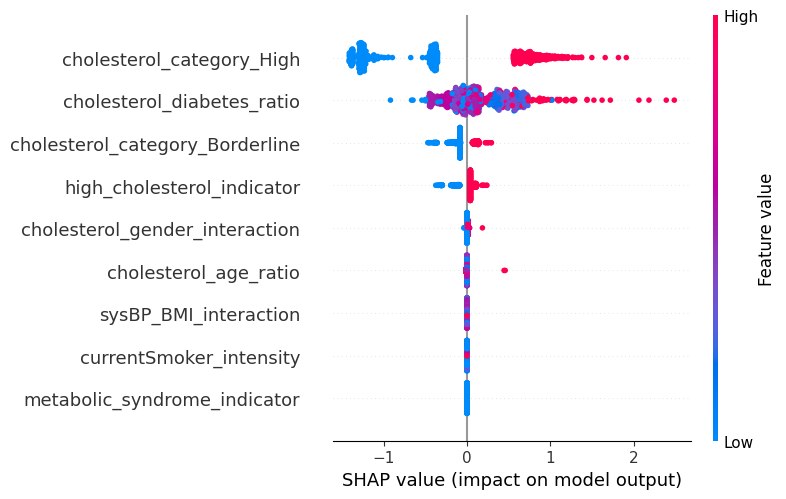

In [293]:
import shap
explainer=shap.TreeExplainer(best_framingham_gb_model)
shap_values=explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test)



*   Top features:cholesterol_category_high,cholesterol_diabetes_ratio and cholesterol_category_Borderline significantly impact the model output indicating cholesterol key role in risk prediction
*   High value impact:high values in cholesterol_category_high and cholesterol_diabetes_ratio increase risk


*   interaction effect:features like cholesterol_age_ratio and sysBP_BMI_interaction have more varied effect,impacting risk depending on specifc combination
*   smaller impact feature:currentSmoker_intensity and metabolic_syndrome_indicator have minor influence but still contribute variably to risk





Stacking

In order to use stacking with two seperate models ihad to ensure that both predictionhad matching lenght.since orginal dataset were of different sizes their prediction array always end up with different length.To make them compatible for combining into meta features i truncated both prediction arrayto the length of the shorter array.This way the meta features could be aligned corectly without any mismatches ensuring accurate stacking and model performance

In [294]:
min_length=min(len(y_pred_best_ridge),len(y_pred_best_gb))

In [295]:
#Truncate prediction to same lenght
y_pred_best_ridge_truncated=y_pred_best_ridge[:min_length]
y_pred_best_gb_truncated=y_pred_best_gb[:min_length]

In [296]:
#Create a new data frame with truncated prediction as features
meta_features=pd.DataFrame({
    'cholesterol_prediction':y_pred_best_ridge_truncated,
    'framingham_prediction':y_pred_best_gb_truncated
})

In [297]:
y_meta_target_combined=y_test_chol[:min_length]

it assigns a subset of y_test_chol array containing the first min_length elements to the variable y_meta_target_combined

In [298]:
len(y_meta_target_combined)

61

In [299]:
x_meta_train,x_meta_val,y_meta_train,y_meta_val=train_test_split(meta_features,y_meta_target_combined,test_size=0.2,random_state=42)

In [300]:
gbr=GradientBoostingRegressor(random_state=42)

In [301]:
param_grid={
    'n_estimators':[50,100,200],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5,6],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [302]:
grid_search=GridSearchCV(estimator=gbr,param_grid=param_grid,cv=5,verbose=1,n_jobs=-1)

In [303]:
grid_search.fit(x_meta_train,y_meta_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [304]:
best_model=grid_search.best_estimator_

In [305]:
y_pred_final=best_model.predict(x_meta_val)

In [306]:
mse_final=mean_squared_error(y_meta_val,y_pred_final)
r2_final=r2_score(y_meta_val,y_pred_final)
mae_final=mean_absolute_error(y_meta_val,y_pred_final)

In [307]:
print('Final Mean Squared Error:',mse_final)
print('Final R-squared:',r2_final)
print('Final Mean Absolute Error',mae_final)

Final Mean Squared Error: 0.033833724166396024
Final R-squared: 0.9412343905092446
Final Mean Absolute Error 0.15326840154382593


In [308]:
!pip install transformers

In [309]:
from transformers import pipeline

In [310]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

In [311]:
tokenizer=AutoTokenizer.from_pretrained("microsoft/DialoGPT-medium")
model=AutoModelForCausalLM.from_pretrained("microsoft/DialoGPT-medium")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/863M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [312]:
def chat_with_bot(user_input,chat_history_ids=None):
  new_input_ids=tokenizer.encode(user_input+tokenizer.eos_token,return_tensors='pt')
  bot_input_ids=torch.cat([chat_history_ids,new_input_ids],dim=-1) if chat_history_ids is not None else new_input_ids
  chat_history_ids=model.generate(bot_input_ids,max_length=1000,pad_token_id=tokenizer.eos_token_id,attention_mask=torch.ones(bot_input_ids.shape,device=bot_input_ids.device))
  bot_response=tokenizer.decode(chat_history_ids[:,bot_input_ids.shape[-1]:][0],skip_special_tokens=True)
  return bot_response,chat_history_ids

In [315]:
response,chat_history_ids=chat_with_bot("Hello how are you")
print(response)

I'm good, how are you?
